In [2]:
import spacy
import sys, scipy, numpy
import json
from spacy.lang.ru import Russian
from spacy_russian_tokenizer import RussianTokenizer, MERGE_PATTERNS
import en_core_web_sm
import pymorphy2
import textacy.extract
import stanza
from spacy_stanza import StanzaLanguage
import stanfordnlp
import scipy
from spacy import displacy
import nltk
import nltk.corpus

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
import contractions
import gensim.downloader as api

import os

from bs4 import BeautifulSoup
import unidecode
from word2number import w2n
import re

import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from tqdm.auto import tqdm
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the figure title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

from tqdm._tqdm_notebook import tqdm_notebook as tqdm

import gensim
import gensim.corpora as corpora

from spellchecker import SpellChecker
import pkg_resources

from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob, Word

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`


# Preprocessing Text

In [3]:
import jamspell

# UTILS
from collections import Counter
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel

#autoencoder
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
corrector = jamspell.TSpellCorrector()
corrector.LoadLangModel('en.bin')

True

In [5]:
tqdm.pandas()

In [6]:
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")

In [7]:
nlp = en_core_web_sm.load()

In [8]:
porter = PorterStemmer()

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
spell = SpellChecker()

In [11]:
cachedStopWords = stopwords.words("english")

In [16]:
stopWords = list(['everywhere', 'although', 'given', 'mainly', 'again', 'make', 'we', 'tends', 'showns', 'sup', 'undoing', 'oh', 'something', 'kg', 'to', 'unto', 'forth', 'had', 'page', 'otherwise', 'can', "one's", 'evermore', 'minus', 'both', 'apart', 'hardly', 'whom', 'put', 'am', 'everything', 'seven', 'somebody', "that's", 'inc', 'specifically', "can't", 'recently', 'even', 'announce', 'caption', 'abroad', 'almost', 'go', "i'd", 'hither', 'probably', 'twice', 'there', 'whither', 'yes', 'affected', 'definitely', 'hes', 'seen', 'maybe', 'provides', "t's", "a's", 'looking', 'forever', 'ff', 'hereafter', 'under', 'actually', 'sec', 'seems', 'second', 'shows', 'beforehand', 'respectively', 'somethan', 'ours', 'g', 'wonder', 'first', 'overall', 'without', 'having', "he's", "don't", "who's", 'half', 'million', 'directly', 'x', 'immediately', 'shes', 'abst', 'soon', 'arise', 'thereby', 'certain', 'd', 'secondly', 'id', 'ref', "he'd", 'namely', 'thanx', 'theres', 'might', "there've", "wasn't", 'happens', 'why', 'as', 'whilst', 'came', 'backward', 'while', 'ie', 'said', 'aside', 'wherein', 'act', 'owing', 'near', 'amidst', 'also', 'hers', 'comes', 'either', 'date', 'added', 'latterly', 'hi', 'say', 'besides', 'different', 'give', 'immediate', 'right', 'somewhere', 'ml', 'neverf', 'ever', 'e', 'exactly', 'gotten', 'ahead', 'w', 'take', 'hundred', 'self', 'nd', 'predominantly', 'someone', 'whereafter', "mustn't", "daren't", 'itself', 'being', "c's", 'needs', "they've", "you've", 'z', 'please', 'serious', 'whoever', 'ask', 'some', 'found', 'allow', 'made', 'value', 'forward', 'unlike', 'due', 'suggest', 'howbeit', 'useful', 'him', 'notwithstanding', 'never', 'often', 'that', 'gave', 'mug', 'refs', 'done', "where's", 'via', 're', 'than', "you'll", 'presumably', 'eight', 'largely', 'anyone', 'once', 'anyway', 'others', 'wherever', 'whereby', 'somehow', 'ending', 'the', 'were', 'for', 'beside', "they'll", 'your', "couldn't", 'begins', 'need', 'seeing', 'invention', 'associated', "hasn't", 'became', 'alongside', 'usually', 'want', 'similarly', 'within', 'sure', "it'd", 'poorly', 'here', 'think', 'containing', 'im', 'available', 'insofar', 'ca', 'themselves', 'little', 'anywhere', 'someday', 'after', 'try', 'kept', "mayn't", 'other', 'tries', 'perhaps', 'several', 'till', 'moreover', 'zero', 'best', 'only', "weren't", 'line', 'did', 'getting', 'uses', 'upwards', "they're", 'an', "i'll", 'q', 'particular', 'formerly', 'appreciate', 'ord', "shouldn't", 'k', 'above', 'nearly', 'six', 'wish', 'he', 'knows', 'far', 'sufficiently', 'looks', 'rd', 'farther', 'consider', 'anyways', 'thereupon', 'fix', "haven't", 'goes', 'non', 'same', 'already', 'greetings', "he'll", 'km', 'lower', 'me', "she'd", 'significant', "they'd", 'que', 'thereafter', 'mrs', 'shall', 'quickly', 'resulted', 'anymore', 'whichever', "ain't", 'get', 'however', 'edu', 'round', 'likewise', 'back', 'of', 'okay', 'hello', 'its', 'a', 'various', 'normally', 'behind', 'importance', 'h', 'if', 'mg', 'few', 'despite', 'ago', "there'll", 'corresponding', 'hid', 'pages', 'mostly', 't', 'theirs', 'sub', 'between', "isn't", 'accordance', 'becomes', 'nos', 'own', 'all', "mightn't", 'much', 'keeps', 'they', "what's", 'th', 'are', 'end', 'such', 'toward', 'whose', 'is', 'come', 'believe', 'rather', 'look', 'past', 'then', 'thanks', 'clearly', 'across', 'com', 'none', 'u', 'one', "wouldn't", 'briefly', 'each', 'concerning', 'do', 'f', 'know', 'allows', 'important', 'run', 'plus', 'really', 'was', 'un', 'better', 'but', "it's", 'old', 'viz', 'heres', "you're", 'below', 'gives', 'et-al', 'ourselves', 'successfully', 'name', 'seemed', 'sometime', 'hopefully', 'example', 'among', 'their', 'used',
                  'may', "didn't", 'thus', 'ignored', 'meanwhile', 'these', 'still', 'affecting', 'how', 'potentially', "that've", 'whether', 'contain', 'her', 'substantially', 'course', 'liked', 'whence', 'nay', 'everyone', 'l', 'whereupon', 'thru', 'means', 'she', 'by', 'inside', 'selves', 'gone', 'apparently', 'whole', 'become', 'c', 'cant', 'related', 'nobody', 'results', 'latter', 'et', 'nevertheless', 'primarily', "what've", 'home', "what'll", 'on', 'himself', 'like', 'hed', 'thirty', 'effect', 'seeming', 'would', 'follows', 'just', "we're", 'known', 'vs', 'described', 'everybody', 'inc.', 'yet', 'what', 'nor', 'pp', 'since', 'every', "there're", 'things', 'his', 'shown', 'p', 'ninety', 'index', 'keep', 'willing', 'help', 'whereas', 'else', 'considering', 'four', 'lets', 'brief', 'any', "c'mon", 'hereby', 'it', 'asking', 'gets', 'no-one', 'merely', 'affects', 'does', 'herein', 'not', "you'd", 'specifying', 'trying', 'meantime', 'regardless', 'anyhow', "we'll", 'recent', 'noone', 'therefore', 'going', 'yourself', 'has', 'another', 'wants', 'necessarily', 'research', 'obviously', 'amongst', 'up', 'though', 'too', 'm', 'auth', 'aren', 'na', 'sensible', 'over', 'ex', 'them', 'stop', 'hence', 'says', 'reasonably', 'many', 'according', 'beginning', 'throughout', 'towards', 'afterwards', 's', 'always', 'i', 'ed', 'eg', 'using', 'especially', 'novel', "there's", "aren't", 'two', 'mine', 'lest', 'co', 'later', 'begin', 'entirely', 'taking', 'saying', 'eighty', 'slightly', 'able', "we'd", 'beyond', 'until', "that'll", 'j', 'placed', 'with', "she'll", 'mean', 'regarding', 'sometimes', 'welcome', 'promptly', 'doing', "let's", 'backwards', 'regards', 'strongly', 'adj', 'those', 'whatever', 'possibly', 'consequently', 'use', 'n', 'very', 'whenever', 'ran', 'before', "i've", 'awfully', 'tell', 'be', 'last', 'outside', "who'd", 'now', 'ltd', 'certainly', 'from', 'anything', 'sorry', 'unlikely', 'us', 'specified', 'sent', 'you', 'specify', 'about', 'myself', 'see', 'ought', 'fairly', 'been', 'thence', 'thats', 'where', 'currently', 'saw', 'most', "i'm", 'well', 'least', 'will', 'opposite', 'our', 'giving', 'hereupon', 'amid', 'at', 'shed', 'seriously', 'per', 'quite', 'noted', 'upon', "oughtn't", 'showed', 'furthermore', 'off', 'neither', 'indicated', 'so', 'particularly', 'section', 'inner', 'inasmuch', 'into', 'causes', 'accordingly', 'herself', 'resulting', 'took', 'my', 'down', 'v', 'obtained', 'except', 'through', 'possible', 'got', 'former', 'relatively', 'part', 'show', 'yours', 'arent', 'nothing', 'thoroughly', 'couldnt', 'followed', 'or', 'beginnings', "who'll", 'contains', 'mr', 'miss', 'following', 'let', 'previously', 'provided', 'should', 'in', 'and', 'readily', 'cause', 'anybody', 'truly', 'whomever', 'nowhere', 'no', 'cannot', 'have', 'could', 'lately', "'ll", 'ok', 'onto', 'omitted', 'present', 'went', 'underneath', 'this', 'neverless', 'during', 'indicates', 'etc', 'downwards', 'somewhat', 'indicate', 'unfortunately', 'seem', 'three', "we've", 'proud', "needn't", 'co.', 'taken', "there'd", 'next', 'less', 'y', 'becoming', 'more', 'nonetheless', 'against', 'biol', "it'll", 'versus', 'thorough', "won't", 'ah', 'r', 'inward', 'low', 'unless', 'significantly', 'indeed', 'uucp', 'together', "she's", 'qv', 'tried', 'along', 'alone', 'thank', 'thing', 'similar', 'who', 'instead', 'new', 'dare', 'around', 'information', "hadn't", 'which', "shan't", 'approximately', 'appear', 'way', 'enough', 'changes', 'o', 'obtain', 'when', 'likely', 'b', 'ones', "doesn't", 'out', 'five', 'necessary', 'must', 'makes', 'fifth', 'away', 'third', 'appropriate', 'elsewhere', 'further', 'therein', "here's", 'itd', 'yourselves', 'nine', 'fewer', 'because'])

In [17]:
stopWords.extend(['rt', 'us', 'like', 'one', 'via', 'ur', 'lo', 'en', 'sometimes', 'eventually', 'somewhere', 
                       'other', 'yes', 'no', 'me', 'I'])

In [18]:
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package words to /Users/lirriel/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lirriel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lirriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lirriel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
words = set(nltk.corpus.words.words())

In [22]:
symbols_to_isolate = '.,?!-;*"…:—()%#$&_/@＼・ω+=”“[]^–>\\°<~•≠™ˈʊɒ∞§{}·τα❤☺ɡ|¢→̶`❥━┣┫┗Ｏ►★©―ɪ✔®\x96\x92●£♥➤´¹☕≈÷♡◐║▬′ɔː€۩۞†μ✒➥═☆ˌ◄½ʻπδηλσερνʃ✬ＳＵＰＥＲＩＴ☻±♍µº¾✓◾؟．⬅℅»Вав❣⋅¿¬♫ＣＭβ█▓▒░⇒⭐›¡₂₃❧▰▔◞▀▂▃▄▅▆▇↙γ̄″☹➡«φ⅓„✋：¥̲̅́∙‛◇✏▷❓❗¶˚˙）сиʿ✨。ɑ\x80◕！％¯−ﬂﬁ₁²ʌ¼⁴⁄₄⌠♭✘╪▶☭✭♪☔☠♂☃☎✈✌✰❆☙○‣⚓年∎ℒ▪▙☏⅛ｃａｓǀ℮¸ｗ‚∼‖ℳ❄←☼⋆ʒ⊂、⅔¨͡๏⚾⚽Φ×θ￦？（℃⏩☮⚠月▸■⇌☐☑⚡☄ǫ╭∩╮，例＞ʕɐ̣Δ₀✞┈╱╲▏▕┃╰▊▋╯┳┊≥☒↑☝ɹ☛♩☞ＡＪＢ◔◡↓♀⬆̱ℏ\x91⠀ˤ╚↺⇤∏✾◦♬³の｜／∵∴√Ω¤☜▲↳▫‿⬇✧ｏｖｍ－２０８＇‰≤∕ˆ⚜☁'
symbols_to_delete = '\n\r\xa0\ue014\t\uf818\uf04a\xad\uf0e0\u200b\u200eعدويهصقأناخلىبمغرЕ\u202a\u202cᴍʏʀᴇɴᴅᴏᴀᴋʜᴜʟᴛᴄᴘʙғᴊᴡɢשלוםבי‼\x81エンジ故障\u2009ᴵ͞\u200fאעכח💯⛽🚄🏼ஜᴠ🚲‐\x7fἐὶήιὲκἀίῃἴξＨ\ufeff\u2028\u3000تحكسةzفزط\u2008🏾🏽🎆\x08‑𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘪𝘧𝘮𝘣地獄谷улкнПоАНה🔗🚽歌舞伎🇸мυтѕ⤵🎃\u200a🐟эпрд\x95\u2002\u2004ˢᵒʳʸᴼᴷᴺʷᵗʰᵉᵘ\x13🚬\ue602άοόςέὸתמדףנרךצט🔄🔤🔛\uf0b7\uf04c\x9f\x10成都ехἸᾶὁ\u202d🍇\ue613小土豆❔⁉\u202f👠》कर्मा🇹🇼蔡英文🎲レクサス外国人关系Сб💋ьыгя不是\x9c\x9d🗑\u2005༼つ༽ḷЗз▱ц￼卖温哥华议会下降你失去所有的钱加拿大坏税骗子🐝ツ\x85🍺آإشءἔ油别克🤡\u2003ʲшчИОРФДЯМюж🖑ὐύύ特殊作戦群щ💨圆明园קℐ⏏ệ\u200d𝓒𝓲𝓿𝓵안영하세요ЖљКћῦ我出生在了可以说普通话汉语好极🖒🚪天一家⚲\u2006⚭⚆⬭⬯⏖新✀╌🇦ХШ\x1f杀鸡给猴看ʁ𝗪𝗵𝗲𝗻𝘆𝗼𝘂𝗿𝗮𝗹𝗶𝘇𝗯𝘁𝗰𝘀𝘅𝗽𝘄𝗱ϖ\u2000үսᴦᎥһͺ\u2007հ\u2001ɩｙｅ൦ｌƽｈ𝐓𝐡𝐞𝐫𝐮𝐝𝐚𝐃𝐜𝐩𝐭𝐢𝐨𝐧Ƅᴨןᑯ໐ΤᏧ௦Іᴑ܁𝐬𝐰𝐲𝐛𝐦𝐯𝐑𝐙𝐣𝐇𝐂𝐘𝟎ԜТᗞ౦〔Ꭻ𝐳𝐔𝐱𝟔𝟓𝐅🐋ﬃё𝘥𝘯𝘶💐🌋🌄🌅𝙬𝙖𝙨𝙤𝙣𝙡𝙮𝙘𝙠𝙚𝙙𝙜𝙧𝙥𝙩𝙪𝙗𝙞𝙝𝙛👺🐷ℋ𝐀𝐥𝐪🚶𝙢Ἱ💸ج패티Ｗ𝙇ᵻɜ🎫\uf0a7БУі🚢🚂ગુજરાતીῆ🏃𝓬𝓻𝓴𝓮𝓽𝓼☘﴾̯﴿₽\ue807𝑻𝒆𝒍𝒕𝒉𝒓𝒖𝒂𝒏𝒅𝒔𝒎𝒗𝒊\u200cЛ‒⎌公寓养宠物吗操美𝒑𝒚𝒐𝑴欢迎来到阿拉斯ספ𝙫𝒌𝙊𝙭𝙆𝙋𝙍𝘼𝙅ﷻ🦄巨收赢得白鬼愤怒要买额ẽ🚗🐳𝟏𝐟𝟖𝟑𝟕𝒄𝟗𝐠𝙄𝙃👇锟斤拷𝗢𝟳𝟱𝟬⦁マルハニチロ株式社⛷한국어ㄸㅓ니͜ʖ𝘿𝙔₵𝒩ℯ𝒾𝓁𝒶𝓉𝓇𝓊𝓃𝓈𝓅ℴ𝒻𝒽𝓀𝓌𝒸𝓎𝙏ζ𝙟𝘃𝗺𝟮𝟭𝟯𝟲👋🦊多伦🐽🎻🎹⛓🏹🍷🦆为和中友谊祝贺与其想象对法如直接问用自己猜本传教士没积唯认识基督徒曾经让相信耶稣复活死怪他但当们聊些政治题时候战胜因圣把全堂结婚孩恐惧且栗谓这样还♾🎸🤕🤒⛑🎁批判检讨🏝🦁🙋😶쥐스탱트뤼도석유가격인상이경제황을렵게만들지않록잘관리해야합다캐나에서대마초와화약금의품런성분갈때는반드시허된사용凸ὰ💲🗯𝙈Ἄ𝒇𝒈𝒘𝒃𝑬𝑶𝕾𝖙𝖗𝖆𝖎𝖌𝖍𝖕𝖊𝖔𝖑𝖉𝖓𝖐𝖜𝖞𝖚𝖇𝕿𝖘𝖄𝖛𝖒𝖋𝖂𝕴𝖟𝖈𝕸知彼百\uf005𝙀𝒛𝑲𝑳𝑾𝒋𝟒𝙒𝘾𝘽𝘩𝘨ὼṑ𝑱𝑹𝑫𝑵𝑪🇰ᓇᒧᔭᐃᐧᐦᑳᐨᓃᓂᑲᐸᑭᑎᓀᐣ点击查版𝑥𝑦𝑧ＮＧ👣\uf020っфΞ\x0b𝑯𝒒𝟐🐲چی𝑮𝗕𝗴ꜥⲣⲏ鉄リ事件ї「」\uf203\uf09a\uf222\ue608\uf202\uf099\uf469\ue607\uf410\ue600燻製シ虚偽屁理屈Г𝑩𝑰𝒀𝑺𝗳𝗜𝗙𝗦𝗧ὺἈἡχῖΛ⤏🇳𝒙ψՁմեռայինրւդձ冬至ὀ𝒁𝑷𝘬𝘱𝘸𝘷𝘐𝘭𝘓𝘖𝘹𝘲𝘫کΒώ💢ΜΟΝΑΕ🇱♲𝝈↴⊘Ȼ𝐎𝐍𝐊𝑭ｇｒｎｔｉｄｕｆｂｋ𝟰🇴🇭🇻🇲𝗞𝗭𝗘𝗤《\uf10aლڡ\U0001f92f\U0001f92aἱ𝗸𝗟𝗠𝗷さようなら🔼'
CONTRACTION_MAPPING = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
isolate_dict = {ord(c):f' {c} ' for c in symbols_to_isolate}
remove_dict = {ord(c):f'' for c in symbols_to_delete}

In [23]:
NON_STOP_WORDS = ['no', 'not']
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [404]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text, slang=True)
    return text

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split())

def remove_mentions(txt):
    return re.sub('(@[A-Za-z0-9_]\S+\s+)', '', (str(txt) + " "))

def remove_digits(txt):
    return list(filter(lambda t: not t.isdigit(), txt))

def spelling_correction(text):
#     print(text)
    misspelled = spell.unknown(text)
#     print(misspelled)
    txt = ' '.join(text)
    txt = corrector.FixFragment(txt)
    txt = re.sub(' ovid', 'covid', txt)
#     print(f'final: {txt}')
#     for m in misspelled:
#         txt = txt.replace(m, spell.correction(m))
        
    return txt.split()

def lemmatize_with_postag(sentence):
    sent = TextBlob(' '.join(sentence))
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return lemmatized_list
    
def text_preprocessing(text, is_tm):
    """preprocess text with default option set to true for all steps"""
    #convert emojies to txt
    text = remove_mentions(text)
    for k, v in CONTRACTION_MAPPING.items():
        text = text.replace(' %s ' % k, ' %s ' % v)
    text = text.translate(remove_dict)
    text = text.translate(isolate_dict)
    if is_tm:
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
    else:
        text = emoji.demojize(text)
    text = remove_url(text)
    text = strip_html_tags(text)
    text = remove_whitespace(text)
    text = remove_accented_chars(text)
    text = expand_contractions(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if not word in stopWords]
    text = remove_digits(text)
#     text = spelling_correction(text)
#     text = lemmatize_with_postag(text)
    return text        

# Read Data

In [25]:
output = [dI for dI in os.listdir('scraper') if os.path.isdir(os.path.join('scraper',dI)) and dI != '.idea' and dI != 'venv' and dI != 'scraper' and dI != '__pycache__' and dI != 'twitter-scraper']

In [26]:
output

['feminismo',
 'timesupnow',
 'sherylsandberg',
 'plannedparenthood',
 'effyourbeautystandards',
 'audreygelman',
 'bumble',
 'femislay',
 'iwillgoout',
 'prochoice',
 'bringbackourgirls',
 'whyididntreport',
 'heforshe',
 'womensreality',
 'whyistayed',
 'girlpower',
 'iamanastywoman',
 'makerswomen',
 'yesallwomen',
 'selflove',
 'fem2',
 'girlboss',
 'feminist',
 'believesurvivors',
 'generationequality',
 'feministfightclub',
 'gurlstalk',
 'womensrights',
 'sarahsophief',
 'ariannahuff',
 'intersectionalfeminism',
 'feministart',
 'women',
 'sadgirlsclub',
 'womensupportingwomen',
 'equality',
 'issarae',
 'lgbt',
 'the.wing',
 'womensmarch',
 'ocasio2018',
 'activist',
 'strongwomen',
 'womenempowerment',
 'genderequality',
 'humanrights',
 'equalrights',
 'womenshould',
 'feminista',
 'metoo',
 'thefutureisfemale',
 'tothegirls',
 'feminism',
 'iamwithher',
 'womenincomics',
 'niunamenos',
 'believewomen',
 'timesup',
 'gloriasteinem',
 'theriotgrrrlproject',
 'woman',
 'nomoore

In [27]:
inst_dta = []
for file in output:
    with open('scraper/' + file + '/' + file + '.json') as json_file:
        wm_data = json.load(json_file)
        for wm in wm_data['GraphImages']:
            if len(wm['edge_media_to_caption']['edges']) > 0:
                txt = wm['edge_media_to_caption']['edges'][0]['node']['text']
                likes = 0
                location_name = None
                loc_city = None
                loc_country = None
                tags = None
                if 'edge_media_preview_like' in wm:
                    likes = wm['edge_media_preview_like']['count']
                if 'location' in wm and wm['location'] is not None:
                    location_name = wm['location']['name']
                    if wm['location']['address_json'] is not None:
                        loc_json = json.loads(wm['location']['address_json'])
                        loc_city = loc_json['city_name']
                        loc_country = loc_json['country_code']
                if 'tags' in wm:
                    tags = wm['tags']
                inst_dta.append([wm['id'], 
                                 None,
                                 file, 
                                 txt,
                                 wm['taken_at_timestamp'],
                                 likes, 
                                 False, 
                                 wm['edge_media_to_comment']['count'], 
                                 location_name, 
                                 loc_city, 
                                 loc_country,
                                 tags])
                if 'edge_media_to_comment' in wm and 'data' in wm['edge_media_to_comment']:
                    for com in wm['edge_media_to_comment']['data']:
                        inst_dta.append([com['id'],
                                         wm['id'], 
                                         file, 
                                         com['text'],
                                         com['created_at'],
                                         0,
                                         True,
                                         0, 
                                         None,
                                         None,
                                         None, 
                                         None])

In [28]:
df_instagram = pd.DataFrame(data=inst_dta,columns=['id', 
                                                   'parent_id',
                                                   'tag',
                                                   'text', 
                                                   'ts', 
                                                   'likes', 
                                                   'is_comment',
                                                   'comments_count',
                                                   'location_name',
                                                   'location_city',
                                                   'location_country',
                                                   'tags'
                                                  ])

In [29]:
df_instagram[df_instagram['id'] == '2249660239859571870']

,id,parent_id,tag,text,ts,likes,is_comment,comments_count,location_name,location_city,location_country,tags
36225,2249660239859571870,None,ariannahuff,Saturday self-care. 🙂💜 #joytrigger | Video Cre...,1582400569,66447,False,6223,None,None,None,[joytrigger]


In [30]:
df_instagram = df_instagram.drop_duplicates(subset=['id'])

In [31]:
len(df_instagram)

70766

In [478]:
twitter_output = [dI for dI in os.listdir('scraper') if not os.path.isdir(os.path.join('scraper',dI)) \
                 and dI.startswith('twitter') and dI.endswith('json')]


In [479]:
twitter_output

['twitter_tothegirls_search.json',
 'twitter_effyourbeautystandards_search.json',
 'twitter_genderequality_search.json',
 'twitter_womenempowerment_tag.json',
 'twitter_effyourbeautystandards_tag.json',
 'twitter_fem2_search_2.json',
 'twitter_woman_search.json',
 'twitter_lgbt_search.json',
 'twitter_gender equality_search_1.json',
 'twitter_nomoore_tag.json',
 'twitter_timesup_search.json',
 'twitter_sexism_search_1.json',
 'twitter_equality_search.json',
 'twitter_whyistayed_search_2.json',
 'twitter_girlboss_search.json',
 'twitter_bringbackourgirls_search.json',
 'twitter_womensupportingwomen_search.json',
 'twitter_feminist_search_2.json',
 'twitter_equalrights_search.json',
 'twitter_yesallwomen_tag.json',
 'twitter_activist_search.json',
 'twitter_womensrights_search.json',
 'twitter_feminista_search.json',
 'twitter_heforshe_search_2.json',
 'twitter_womenshould_search.json',
 'twitter_woman_tag.json',
 'twitter_whyididntreport_tag.json',
 'twitter_iamanastywoman_tag.json',
 '

In [33]:
twitter_dta = []
for file in twitter_output:
    with open('scraper/' + file) as json_file:
        tw_data = json.load(json_file)
        for tw in tw_data:
            tags = list(map(lambda t: t['text'], tw['entities']['hashtags']))
            loc_country = None
            loc_country_name = None
            if tw['geo'] is not None:
                loc_country = tw['place']['country_code']
                loc_country_name = tw['place']['name']
            possibly_sensitive = None
            if 'possibly_sensitive' in tw:
                possibly_sensitive = tw['possibly_sensitive']
            twitter_dta.append([tw['id'], tw['text'], tw['retweet_count'], tw['created_at'], 
                               tags, tw['is_quote_status'], tw['retweet_count'],
                               tw['favorite_count'], possibly_sensitive, loc_country, loc_country_name])

In [34]:
df_twitter = pd.DataFrame(data=twitter_dta,columns=['id', 'text', 'retweet', 'created_at', 'tags', 
                                                   'is_quote_status', 'retweet_count', 'favorite_count', 
                                                   'possibly_sensitive', 'loc_country', 'loc_country_name'])

In [35]:
df_twitter

,id,text,retweet,created_at,tags,is_quote_status,retweet_count,favorite_count,possibly_sensitive,loc_country,loc_country_name
0,1259945972555227138,RT @thestartupsquad: Really @Forbes? 8 boys pl...,24,Mon May 11 20:38:23 +0000 2020,[],False,24,0,None,None,None
1,1259945897166647296,RT @MPKchaitu: @jyotitiwari05 @ArvindKejriwal ...,2,Mon May 11 20:38:05 +0000 2020,[],False,2,0,None,None,None
2,1259945796671332352,RT @wkl_media: Birthday Shoot 🎁🎉🎂. . .\n.\nMod...,1,Mon May 11 20:37:41 +0000 2020,"[birthdayshoot, bedroom, shirt, indoor]",False,1,0,None,None,None
3,1259945138245296129,RT @MPKchaitu: @jyotitiwari05 @ArvindKejriwal ...,2,Mon May 11 20:35:04 +0000 2020,[],False,2,0,None,None,None
4,1259944644969771012,@jyotitiwari05 @ArvindKejriwal @SwatiJaiHind @...,2,Mon May 11 20:33:06 +0000 2020,[],False,2,2,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
190825,1259488562183114753,“It has made me see the mismatch between value...,0,Sun May 10 14:20:48 +0000 2020,[],False,0,0,False,None,None
190826,1259488533527572480,Excited to share the latest addition to my #et...,0,Sun May 10 14:20:41 +0000 2020,[etsy],False,0,0,False,None,None
190827,1259488500547813376,Happy Sunday to all you Amazing moms ❤️💛🧡💚💙 #m...,1,Sun May 10 14:20:33 +0000 2020,"[mothersday, happymothersday, publicist, entre...",False,1,1,False,None,None
190828,1259488408898080769,Excited to share the latest addition to my #et...,0,Sun May 10 14:20:11 +0000 2020,[etsy],False,0,0,False,None,None


In [57]:
reddit_output = [dI for dI in os.listdir('scraper') if not os.path.isdir(os.path.join('scraper',dI)) \
                 and not dI.startswith('twitter') and dI.endswith('json') and 'tag' not in dI]
reddit_output

['TheGirlSurvivalGuide.json',
 'GirlsGoneWired.json',
 'feminism.json',
 'antifeminists.json',
 'femmethoughts.json',
 'GirlGamers.json',
 'scientits.json',
 'BreadTube.json',
 'blackladies.json',
 'NotHowGirlsWork.json',
 'ContraPoints.json',
 'FemaleDatingStrategy.json',
 'women.json',
 'WitchesVsPatriarchy.json']

In [58]:
reddit_info = []
for reddit_file in reddit_output:
    with open('scraper/' + str(reddit_file)) as json_file:
        reddit_data = json.load(json_file)
        for subreddit in reddit_data:
            txt = subreddit.get('title', '') + '. ' + \
                subreddit.get('selftext', '')
            txt_all = txt
            count = 0
            for c in subreddit.get('comments', []):
                txt_all = txt_all + c['body']
                count += 1
                count_c = 0
                for cc in c['comments']:
                    txt_all = txt_all + cc['body']
                    count += 1
                    count_c += 1
                    count_cc = 0
                    for ccc in cc['comments']:
                        reddit_info.append([
                            ccc['id'], #id
                            ccc['parent_id'], #parent_id
                            subreddit.get('id', ''), #topic_id
                            str(reddit_file), #subreddit_topic
                            ccc['body'], #text
                            ccc['score'], #score
                            ccc['created_utc'], #utc
                            True,#is_comment
                            0#com_count
                        ])
                        txt_all = txt_all + ccc['body']
                        count += 1
                        count_cc += 1
                    reddit_info.append([
                        cc['id'],
                        cc['parent_id'], 
                        subreddit.get('id', ''),
                        str(reddit_file),
                        cc['body'],
                        cc['score'], 
                        cc['created_utc'], 
                        True, 
                        count_cc
                    ])
                reddit_info.append([
                    c['id'], 
                    c['parent_id'], 
                    subreddit.get('id', ''), 
                    str(reddit_file), 
                    c['body'], 
                    c['score'], 
                    c['created_utc'],
                    True,
                    count_c
                ])
            reddit_info.append([
                subreddit.get('id', ''),
                None, 
                None,
                str(reddit_file), 
                txt, 
                subreddit.get('score', None), 
                subreddit.get('created_utc', None), 
                True, 
                count
            ])
df_reddit = pd.DataFrame(data=reddit_info, columns=[
                         'id', 'parent_id', 'topic_id', 'subreddit_topic', 'text', 'score', 'utc', 'is_comment', 'com_count'])



In [61]:
df_reddit

,id,parent_id,topic_id,subreddit_topic,text,score,utc,is_comment,com_count,text_proc_tm,text_proc
0,ejnf52r,t3_b6og5d,b6og5d,TheGirlSurvivalGuide.json,Locking for so many reasons,1,1.553860e+09,False,0,lock reason,lock reason
1,ejm4hd0,t1_ejm1dfj,b6og5d,TheGirlSurvivalGuide.json,Tbh that’s a rlly good idea & ive never given ...,78,1.553813e+09,False,0,tbh rally good idea think deffo start,tbh rally good idea think deffo start
2,ejncosa,t1_ejm1dfj,b6og5d,TheGirlSurvivalGuide.json,You know they are uber and are coming for you....,1,1.553857e+09,False,0,uber come billion footpeople ya uber tell bran...,uber come billion footpeople ya uber tell bran...
3,ejm1dfj,t1_ejlzudf,b6og5d,TheGirlSurvivalGuide.json,i do this all the time! most of them already s...,310,1.553811e+09,False,2,time car approach check license plate car matc...,time car approach check license plate car matc...
4,ejmn1jh,t1_ejlzudf,b6og5d,TheGirlSurvivalGuide.json,Wait people don't do this? How else do you kno...,26,1.553826e+09,False,0,wait people uber london base remembers letter ...,wait people uber london base remembers letter ...
...,...,...,...,...,...,...,...,...,...,...,...
223666,fnm8dzo,t3_g298zf,g298zf,WitchesVsPatriarchy.json,Can I be the High Priestess? She seems to know...,2,1.587067e+09,False,0,high priestess,high priestess
223667,fnqzdhw,t3_g298zf,g298zf,WitchesVsPatriarchy.json,"I have a rare gem—my husband is a nurse, an ar...",2,1.587176e+09,False,0,rare gem husband nurse ardent feminist beautif...,rare gem husband nurse ardent feminist beautif...
223668,fnk7zig,t3_g298zf,g298zf,WitchesVsPatriarchy.json,👍,3,1.587018e+09,False,0,,thumb
223669,fnkhxod,t3_g298zf,g298zf,WitchesVsPatriarchy.json,I'm a man. Can confirm this is exactly what ha...,2,1.587028e+09,False,0,man confirm happen,man confirm happen


# Sentiment Analysis

## Traning Sentiment

### Check the hypothesis with limited train dataset

In [24]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin-1', header=None)

In [26]:
df_short = df.sample(frac=1).loc[:60000]

In [27]:
df_short['txt_proc'] = df_short[5].progress_apply(text_preprocessing)

In [32]:
df_short['txt_proc'] = df_short['txt_proc'].progress_apply(lambda t: ' '.join(t))

In [79]:
df_short['txt_proc_1'] = df_short[5].progress_apply(text_preprocessing)

In [ ]:
df_short.head()

In [5]:
# Simple pre-processing pipeline
def simple_split(t):
    return str(t).lower().translate(str.maketrans('', '', string.punctuation))

In [ ]:
df['txt_proc'] = df[5].progress_apply(lambda t: text_preprocessing(t, False))

In [99]:
vectorizer = CountVectorizer(min_df=20, max_df=0.9)
X = vectorizer.fit_transform(df['txt_proc'].values)

In [33]:
vectorizer = CountVectorizer(min_df=20, max_df=0.9)
X_short = vectorizer.fit_transform(df_short['txt_proc'].values)

In [10]:
y = df[0]

In [28]:
y_short = df_short[0]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.356, random_state=2364924)

In [34]:
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X_short, y_short, test_size=0.356, random_state=2364924)

In [38]:
# reg = LinearRegression(normalize=True, n_jobs=-1).fit(X, df[0])
clf_short = LogisticRegression(random_state=566,n_jobs=-1).fit(X_train_sh, y_train_sh)

/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [29]:
y_hat = clf.predict(X_test)

In [40]:
y_hat_short = clf_short.predict(X_test_sh)

In [30]:
y_hat

array([4, 4, 0, ..., 4, 4, 4])

In [31]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79    284707
           4       0.78      0.82      0.80    284893

    accuracy                           0.79    569600
   macro avg       0.79      0.79      0.79    569600
weighted avg       0.79      0.79      0.79    569600



In [69]:
print(classification_report(y_test_sh, y_hat_short))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    256526
           4       0.78      0.81      0.79    257077

    accuracy                           0.79    513603
   macro avg       0.79      0.79      0.79    513603
weighted avg       0.79      0.79      0.79    513603



In [84]:
#without stemming
print(classification_report(y_test_sh, y_hat_short))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    256526
           4       0.78      0.81      0.79    257077

    accuracy                           0.79    513603
   macro avg       0.79      0.79      0.79    513603
weighted avg       0.79      0.79      0.79    513603



In [41]:
#bigger
print(classification_report(y_test_sh, y_hat_short))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    106031
           4       0.75      0.79      0.77    106394

    accuracy                           0.77    212425
   macro avg       0.77      0.77      0.77    212425
weighted avg       0.77      0.77      0.77    212425



In [68]:
df[0].value_counts()

4    800000
0    800000
Name: 0, dtype: int64

In [123]:
df_train=pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', header=None)

In [392]:
df_train.head()

,0,1,2,3,4,5,text,text_proc,text_proc_tm
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic 2y1l awww bummer shoulda david ca...,http twitpic 2y1l awww bummer shoulda david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,upset update facebook texting cry result schoo...,upset update facebook texting cry result schoo...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,dived times ball managed save rest bounds,dived times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,body feels itchy fire,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",behaving mad,behaving mad


In [393]:
np.unique(df_train[0].values)

array([0, 4])

In [131]:
df_train['text_proc'] = df_train['text'].progress_apply(lambda t: ' '.join(text_preprocessing(t, False)))

In [132]:
df_train['text_proc_tm'] = df_train['text'].progress_apply(lambda t: ' '.join(text_preprocessing(t, True)))

In [125]:
df_valid = pd.read_csv('valid.csv').dropna()
df_valid.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [395]:
df_test_twitter = pd.read_csv('datasets/sentiment/test_twitter.csv')

In [396]:
df_test_twitter_with_neut = df_test_twitter

In [158]:
df_test_twitter.head()

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,2
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0


In [397]:
df_test_twitter = df_test_twitter[df_test_twitter['sentiment'] != 'neutral']

In [398]:
df_test_twitter['target'] = df_test_twitter['sentiment'].\
              apply(lambda x: 0 if x == 'negative' else (2 if x == 'neutral' else 4))

In [400]:
df_test_twitter_with_neut['target'] = df_test_twitter_with_neut['sentiment'].\
              apply(lambda x: 0 if x == 'negative' else (2 if x == 'neutral' else 4))

In [399]:
np.unique(df_test_twitter['sentiment'].values)

array(['negative', 'positive'], dtype=object)

In [401]:
np.unique(df_test_twitter_with_neut['sentiment'].values)

array(['negative', 'neutral', 'positive'], dtype=object)

In [161]:
df_test_twitter.head()

,textID,text,selected_text,sentiment,target
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,4


In [163]:
# df_1['selected_txt_proc'] = df_1['selected_text'].progress_apply(lambda t: ' '.join(text_preprocessing(t, False)))
df_test_twitter['txt_proc'] = df_test_twitter['text'].progress_apply(lambda t: ' '.join(text_preprocessing(t, True)))

In [405]:
df_test_twitter_with_neut['txt_proc'] = df_test_twitter_with_neut['text'].\
                      progress_apply(lambda t: ' '.join(text_preprocessing(t, True)))

In [164]:
df_test_imdb = pd.read_csv('datasets/sentiment/test_imdb.csv')

In [168]:
df_test_imdb.head()

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,4
1,A wonderful little production. <br /><br />The...,positive,4
2,I thought this was a wonderful way to spend ti...,positive,4
3,Basically there's a family where a little boy ...,negative,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,4


In [169]:
df_test_imdb['target'] = df_test_imdb.sentiment.replace('positive', 4)
df_test_imdb['target'] = df_test_imdb.target.replace('negative', 0)

In [172]:
df_test_imdb['txt_proc'] = df_test_imdb['review'].progress_apply(lambda t: ' '.join(text_preprocessing(t, True)))

### train_eval_sentiment func

In [179]:
def train_eval_sentiment(x, y, min_df=20, max_df=0.9, testsets=[]):
    clf = LogisticRegression(random_state=566,n_jobs=-1)
    rf = RandomForestClassifier(random_state=566,n_jobs=-1, verbose=1, n_estimators=600, max_depth=5)
    cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6) 
    #CountVectorizer
    vectorizer = CountVectorizer(min_df=min_df, max_df=0.9)
    
    X = vectorizer.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666, 
                                                        shuffle=True, stratify=y)
    
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print("CountVectorizer, LogisticRegression")
    print(classification_report(y_test, y_hat))
    
    for testset in testsets:
        name, X_testset, y_testset = testset
        y_testset_hat = clf.predict(vectorizer.transform(X_testset))
        print(f"{name}: CountVectorizer, LogisticRegression")
        print(classification_report(y_testset, y_testset_hat))
    
    
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    print("CountVectorizer, RandomForestClassifier")
    print(classification_report(y_test, y_hat))
    
    for testset in testsets:
        name, X_testset, y_testset = testset
        y_testset_hat = rf.predict(vectorizer.transform(X_testset))
        print(f"{name}: CountVectorizer, RandomForestClassifier")
        print(classification_report(y_testset, y_testset_hat))

    cb.fit(X_train, y_train, logging_level='Silent')
    y_hat = cb.predict(X_test)
    print("CountVectorizer, CatBoostClassifier")
    print(classification_report(y_test, y_hat))
    
    for testset in testsets:
        name, X_testset, y_testset = testset
        y_testset_hat = cb.predict(vectorizer.transform(X_testset))
        print(f"{name}: CountVectorizer, CatBoostClassifier")
        print(classification_report(y_testset, y_testset_hat))
    
    #TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df)
    X = tfidf_vectorizer.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666,
                                                        shuffle=True, stratify=y)
    
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print("TfidfVectorizer, LogisticRegression")
    print(classification_report(y_test, y_hat))
    
    for testset in testsets:
        name, X_testset, y_testset = testset
        y_testset_hat = clf.predict(tfidf_vectorizer.transform(X_testset))
        print(f"{name}: TfidfVectorizer, LogisticRegression")
        print(classification_report(y_testset, y_testset_hat))
    
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    print("TfidfVectorizer, RandomForestClassifier")
    print(classification_report(y_test, y_hat))
    
    for testset in testsets:
        name, X_testset, y_testset = testset
        y_testset_hat = rf.predict(tfidf_vectorizer.transform(X_testset))
        print(f"{name}: TfidfVectorizer, LogisticRegression")
        print(classification_report(y_testset, y_testset_hat))
    
    cb.fit(X_train, y_train, logging_level='Silent')
    y_hat = cb.predict(X_test)
    print("TfidfVectorizer, CatBoostClassifier")
    print(classification_report(y_test, y_hat))
    
    for testset in testsets:
        name, X_testset, y_testset = testset
        y_testset_hat = cb.predict(tfidf_vectorizer.transform(X_testset))
        print(f"{name}: TfidfVectorizer, CatBoostClassifier")
        print(classification_report(y_testset, y_testset_hat))

In [177]:
df_test_twitter['txt_proc']

1                                       sooo sad san diego
2                                            boss bullying
3                                          interview leave
4                              sons couldn releases bought
6                        2am feedings baby fun smiles coos
                               ...                        
27475                                          enjoy night
27476                       denver husband lost job afford
27477    ve wondered rake client clear net don force de...
27478    yay good enjoy break hectic weekend care hun xxxx
27479                                                worth
Name: txt_proc, Length: 16363, dtype: object

In [145]:
df_train.head()

,0,1,2,3,4,5,text,text_proc,text_proc_tm
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic 2y1l awww bummer shoulda david ca...,http twitpic 2y1l awww bummer shoulda david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,upset update facebook texting cry result schoo...,upset update facebook texting cry result schoo...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,dived times ball managed save rest bounds,dived times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,body feels itchy fire,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",behaving mad,behaving mad


In [180]:
train_eval_sentiment(df_train['text_proc'], df_train[0], testsets=[
    ("TWITTER TEST", df_test_twitter['txt_proc'], df_test_twitter['target']),
    ("IMDB TEST", df_test_imdb['txt_proc'], df_test_imdb['target'])
])

CountVectorizer, LogisticRegression
              precision    recall  f1-score   support

           0       0.77      0.70      0.73    160000
           4       0.73      0.79      0.76    160000

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.74    320000
weighted avg       0.75      0.75      0.74    320000

TWITTER TEST: CountVectorizer, LogisticRegression
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      7781
           4       0.83      0.85      0.84      8582

    accuracy                           0.83     16363
   macro avg       0.83      0.83      0.83     16363
weighted avg       0.83      0.83      0.83     16363

IMDB TEST: CountVectorizer, LogisticRegression
              precision    recall  f1-score   support

           0       0.75      0.63      0.68     25000
           4       0.68      0.79      0.73     25000

    accuracy                           0.71     5

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   50.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    2.4s finished


CountVectorizer, RandomForestClassifier
              precision    recall  f1-score   support

           0       0.77      0.57      0.65    160000
           4       0.66      0.83      0.73    160000

    accuracy                           0.70    320000
   macro avg       0.71      0.70      0.69    320000
weighted avg       0.71      0.70      0.69    320000



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.2s finished


TWITTER TEST: CountVectorizer, RandomForestClassifier
              precision    recall  f1-score   support

           0       0.83      0.68      0.74      7781
           4       0.75      0.87      0.81      8582

    accuracy                           0.78     16363
   macro avg       0.79      0.77      0.77     16363
weighted avg       0.79      0.78      0.78     16363



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    1.6s finished


IMDB TEST: CountVectorizer, RandomForestClassifier
              precision    recall  f1-score   support

           0       0.68      0.73      0.70     25000
           4       0.70      0.65      0.68     25000

    accuracy                           0.69     50000
   macro avg       0.69      0.69      0.69     50000
weighted avg       0.69      0.69      0.69     50000

CountVectorizer, CatBoostClassifier
              precision    recall  f1-score   support

           0       0.78      0.62      0.69    160000
           4       0.69      0.82      0.75    160000

    accuracy                           0.72    320000
   macro avg       0.73      0.72      0.72    320000
weighted avg       0.73      0.72      0.72    320000

TWITTER TEST: CountVectorizer, CatBoostClassifier
              precision    recall  f1-score   support

           0       0.84      0.74      0.78      7781
           4       0.79      0.87      0.83      8582

    accuracy                           0.81  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    5.2s finished


TfidfVectorizer, RandomForestClassifier
              precision    recall  f1-score   support

           0       0.76      0.57      0.65    160000
           4       0.66      0.82      0.73    160000

    accuracy                           0.70    320000
   macro avg       0.71      0.70      0.69    320000
weighted avg       0.71      0.70      0.69    320000



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.7s finished


TWITTER TEST: TfidfVectorizer, LogisticRegression
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      7781
           4       0.75      0.87      0.81      8582

    accuracy                           0.78     16363
   macro avg       0.79      0.78      0.78     16363
weighted avg       0.79      0.78      0.78     16363



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.0s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    5.8s finished


IMDB TEST: TfidfVectorizer, LogisticRegression
              precision    recall  f1-score   support

           0       0.73      0.49      0.58     25000
           4       0.62      0.82      0.70     25000

    accuracy                           0.65     50000
   macro avg       0.67      0.65      0.64     50000
weighted avg       0.67      0.65      0.64     50000

TfidfVectorizer, CatBoostClassifier
              precision    recall  f1-score   support

           0       0.78      0.62      0.69    160000
           4       0.69      0.82      0.75    160000

    accuracy                           0.72    320000
   macro avg       0.73      0.72      0.72    320000
weighted avg       0.73      0.72      0.72    320000

TWITTER TEST: TfidfVectorizer, CatBoostClassifier
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      7781
           4       0.79      0.87      0.83      8582

    accuracy                           0.81     1

# Sentiment Analysis

In [183]:
def get_sa_model(x, y):
    lr = LogisticRegression(random_state=566, n_jobs=-1)
    vectorizer = CountVectorizer(min_df=20, max_df=0.9)
    
    X = vectorizer.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666,
                                                        shuffle=True, stratify=y)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print("CountVectorizer, LogisticRegression")
    print(classification_report(y_test, y_hat))
    return clf, vectorizer

In [184]:
clf, cv = get_sa_model(df_train['text_proc'], df_train[0])

CountVectorizer, LogisticRegression
              precision    recall  f1-score   support

           0       0.77      0.70      0.73    160000
           4       0.73      0.79      0.76    160000

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.74    320000
weighted avg       0.75      0.75      0.74    320000



In [189]:
df_twitter['text_proc_sentiment'] = clf.predict(cv.transform(df_twitter['text_proc'].values))

In [364]:
df_twitter['text_proc_sentiment_prob_pos'] = clf.predict_proba(cv.transform(df_twitter['text_proc'].values))[:,1]

In [190]:
df_instagram['text_proc_sentiment'] = clf.predict(cv.transform(df_instagram['text_proc'].values))

In [368]:
df_instagram['text_proc_sentiment_prob_pos'] = clf.predict_proba(cv.transform(df_instagram['text_proc'].values))[:,1]

In [191]:
df_reddit['text_proc_sentiment'] = clf.predict(cv.transform(df_reddit['text_proc'].values))

In [369]:
df_reddit['text_proc_sentiment_prob_pos'] = clf.predict_proba(cv.transform(df_reddit['text_proc'].values))[:,1]

In [370]:
df_instagram_unique = df_instagram.drop_duplicates(subset=['id'])
df_twitter_unique = df_twitter.drop_duplicates(subset=['id'])
df_reddit_unique = df_reddit.drop_duplicates(subset=['id'])

[Text(0.5, 0, 'Reddit sentiment')]

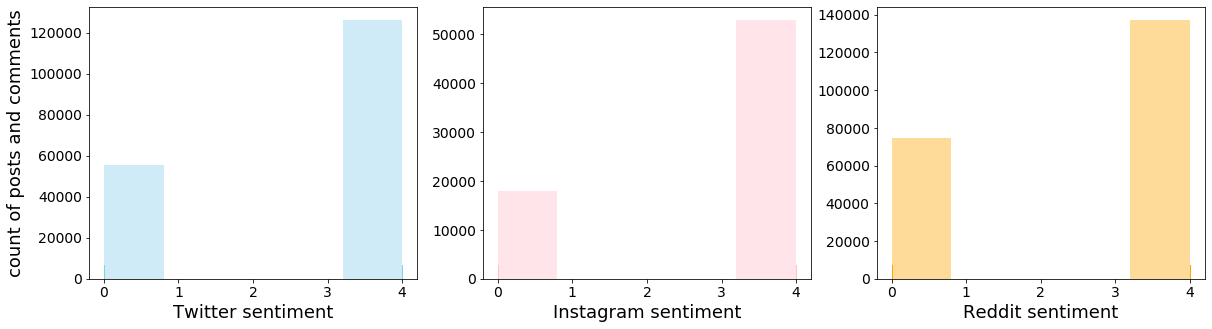

In [236]:
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
print(axes)
ax = sns.distplot(df_twitter_unique['text_proc_sentiment'], 
             kde=False, rug=True, bins=5, label="Twitter", color="skyblue", ax=axes[0])
ax.set(xlabel='Twitter sentiment', ylabel='count of posts and comments')

ax1= sns.distplot(df_instagram_unique['text_proc_sentiment'], 
             kde=False, rug=True, bins=5, label="Instagram", color="pink", ax=axes[1])
ax1.set(xlabel='Instagram sentiment')

ax2 = sns.distplot(df_reddit_unique['text_proc_sentiment'], 
             kde=False, rug=True, bins=5, label="Reddit", color="orange", ax=axes[2])
ax2.set(xlabel='Reddit sentiment', )



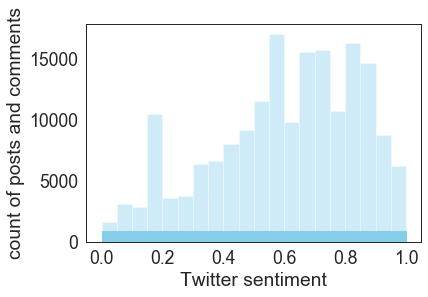

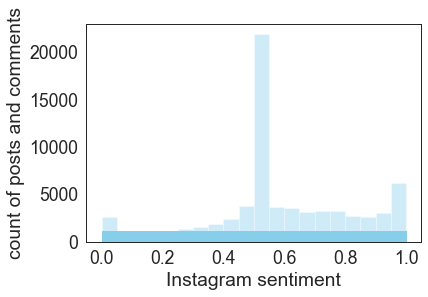

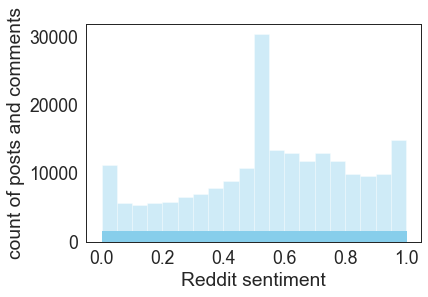

In [386]:
plt.figure()
ax = sns.distplot(df_twitter_unique['text_proc_sentiment_prob_pos'], 
             kde=False, rug=True, bins=20, label="Twitter", color="skyblue")
ax.set(xlabel='Twitter sentiment', ylabel='count of posts and comments')
plt.show()

plt.figure()
ax = sns.distplot(df_instagram_unique['text_proc_sentiment_prob_pos'], 
             kde=False, rug=True, bins=20, label="Instagram", color="skyblue")
ax.set(xlabel='Instagram sentiment', ylabel='count of posts and comments')
plt.show()


plt.figure()
ax = sns.distplot(df_reddit_unique['text_proc_sentiment_prob_pos'], 
             kde=False, rug=True, bins=20, label="Instagram", color="skyblue")
ax.set(xlabel='Reddit sentiment', ylabel='count of posts and comments')
plt.show()

In [439]:
df_twitter_unique['text_proc_sentiment_prob'] = \
    df_twitter_unique['text_proc_sentiment_prob_pos'].\
       progress_apply(lambda t: 4 if t >= 0.675 else 0 if t <= 0.33 else 2)

df_instagram_unique['text_proc_sentiment_prob'] = \
    df_instagram_unique['text_proc_sentiment_prob_pos'].\
       progress_apply(lambda t: 4 if t >= 0.675 else 0 if t <= 0.33 else 2)

df_reddit_unique['text_proc_sentiment_prob'] = \
    df_reddit_unique['text_proc_sentiment_prob_pos'].\
        progress_apply(lambda t: 4 if t >= 0.675 else 0 if t <= 0.33 else 2)

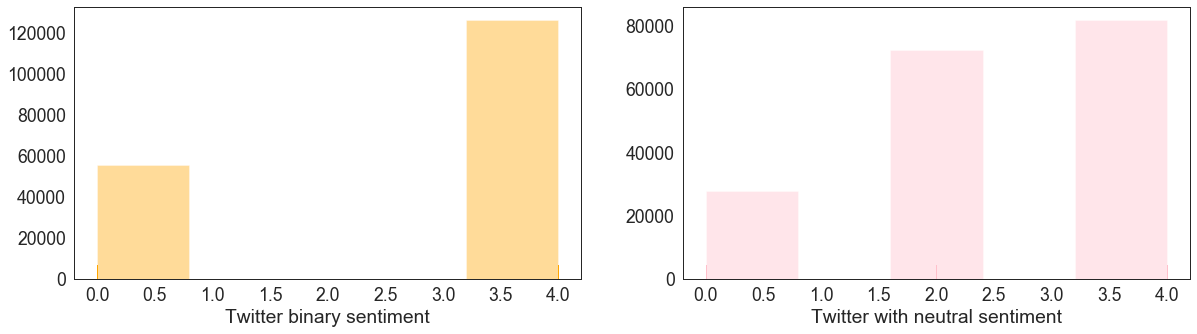

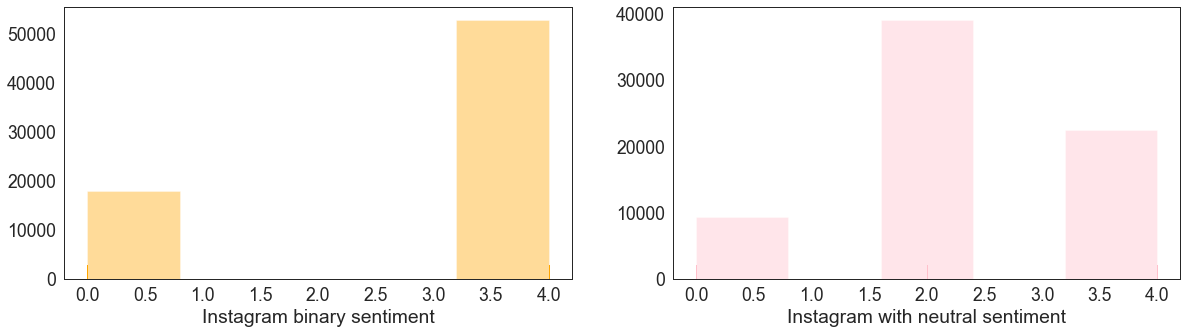

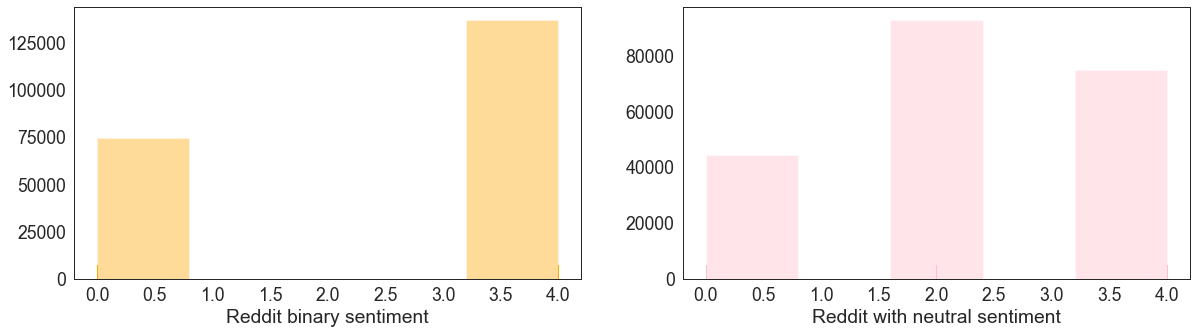

In [443]:
def show_hist(df, name):
    f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

    ax2 = sns.distplot(df['text_proc_sentiment'], 
                 kde=False, rug=True, bins=5, label="Twitter original", color="orange", ax=axes[0])
    ax2.set(xlabel=name+ ' binary sentiment', )


#     ax = sns.distplot(df['text_proc_sentiment_prob_pos'], 
#                  kde=False, rug=True, bins=5, label="Twitter", color="skyblue", ax=axes[1])
#     ax.set(xlabel='Twitter sentiment')

    ax1= sns.distplot(df['text_proc_sentiment_prob'], 
                 kde=False, rug=True, bins=5, label="Twitter prob", color="pink", ax=axes[1])
    ax1.set(xlabel=name + ' with neutral sentiment')

    plt.show()


show_hist(df_twitter_unique, 'Twitter')
show_hist(df_instagram_unique, 'Instagram')
show_hist(df_reddit_unique, 'Reddit')


In [221]:
print(f'Negative Twitter: {len(df_twitter_unique[df_twitter_unique["text_proc_sentiment"] == 4]) / len(df_twitter_unique) * 100}')
print(f'Negative Instagram: {len(df_instagram_unique[df_instagram_unique["text_proc_sentiment"] == 4]) / len(df_instagram_unique) * 100}')
print(f'Negative Reddit: {len(df_reddit_unique[df_reddit_unique["text_proc_sentiment"] == 4]) / len(df_reddit_unique) * 100}')



Negative Twitter: 69.47006383447062
Negative Instagram: 74.71808495605234
Negative Reddit: 64.81932947802093


## Check Neutral

In [408]:
y_hat = clf.predict(cv.transform(df_test_twitter_with_neut['txt_proc'].values))

In [409]:
np.unique(y_hat)

array([0, 4])

In [417]:
df_test_twitter_with_neut['sent_proba'] = \
             clf.predict_proba(cv.transform(df_test_twitter_with_neut['txt_proc'].values))[:,1]

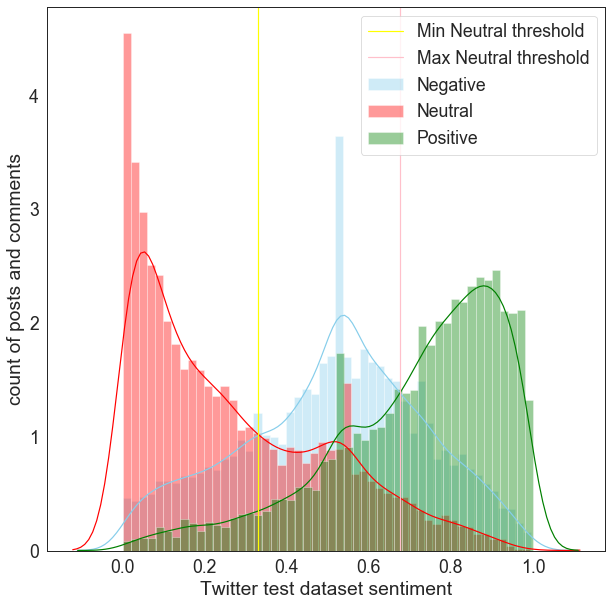

In [438]:
plt.figure(figsize=(10, 10))
ax = sns.distplot(df_test_twitter_with_neut[df_test_twitter_with_neut['target'] == 2]['sent_proba'], 
             kde=True, bins=50, label="Instagram", color="skyblue")
sns.distplot(df_test_twitter_with_neut[df_test_twitter_with_neut['target'] == 0]['sent_proba'], 
             kde=True, bins=50, label="Instagram", color="red")
sns.distplot(df_test_twitter_with_neut[df_test_twitter_with_neut['target'] == 4]['sent_proba'], 
             kde=True, bins=50, label="Instagram", color="green")
ax.set(xlabel='Twitter test dataset sentiment', ylabel='count of posts and comments')
plt.axvline(0.33, 0, 4, color="yellow")
plt.axvline(0.675, 0, 4, color="pink")
ax.legend(['Min Neutral threshold', 'Max Neutral threshold', 'Negative', 'Neutral', 'Positive'],loc='best')
plt.show()

In [475]:
df_test_twitter_with_neut['y_hat'] = df_test_twitter_with_neut['sent_proba'].\
        progress_apply(lambda t: 4 if t >= 0.675 else 0 if t <= 0.33 else 2)

In [476]:
df_test_twitter_with_neut.head()

,textID,text,selected_text,sentiment,target,txt_proc,sent_proba,y_hat
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,2,responded,0.350036,2
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0,sooo sad san diego,0.031745,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0,boss bullying,0.285696,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0,interview leave,0.426065,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0,sons couldn releases bought,0.293491,0


In [477]:
print(classification_report(df_test_twitter_with_neut['target'], df_test_twitter_with_neut['y_hat']))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      7781
           2       0.57      0.54      0.55     11118
           4       0.64      0.65      0.64      8582

    accuracy                           0.61     27481
   macro avg       0.61      0.61      0.61     27481
weighted avg       0.61      0.61      0.61     27481



## Twitter

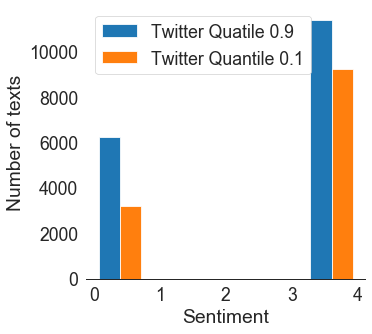

In [248]:
df_twitter_unique_posts = df_twitter_unique[df_twitter_unique['is_quote_status'] == False]
df_twitter_unique_with_likes = df_twitter_unique_posts[df_twitter_unique_posts['retweet_count'] > 0]
df_twitter_pop = df_twitter_unique_with_likes[df_twitter_unique_with_likes.retweet_count >= \
                                             df_twitter_unique_with_likes.retweet_count.quantile(0.85)]
df_twitter_unpop = df_twitter_unique_with_likes[df_twitter_unique_with_likes.retweet_count <= \
                                             df_twitter_unique_with_likes.retweet_count.quantile(0.1)]

sns.set_context("paper", font_scale=2)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(5,5))
sns.despine(left=True)

ax.hist([df_twitter_pop['text_proc_sentiment'], df_twitter_unpop['text_proc_sentiment']], 
              bins=5, label=["Twitter Quatile 0.9" , "Twitter Quantile 0.1"])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of texts')
ax.legend()
plt.show()


## Instagram

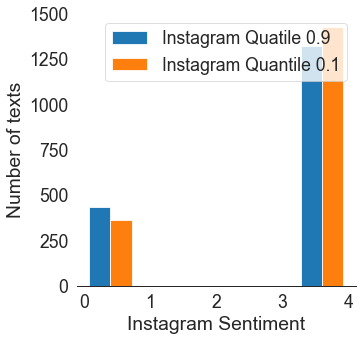

In [292]:
df_instagram_unique_with_likes = df_instagram_unique[df_instagram_unique.likes > 0]
df_instagram_unique_without_likes = df_instagram_unique[(df_instagram_unique.likes == 0)\
                                                        & (df_instagram_unique.is_comment == False)]
df_inst_unpop = df_instagram_unique_with_likes[df_instagram_unique_with_likes.likes <= df_instagram_unique_with_likes.likes.quantile(0.1)]
df_inst_pop = df_instagram_unique_with_likes[df_instagram_unique_with_likes.likes >= df_instagram_unique_with_likes.likes.quantile(0.9)]

sns.set_context("paper", font_scale=2)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(5,5))
sns.despine(left=True)

ax.hist([df_inst_pop['text_proc_sentiment'], df_inst_unpop['text_proc_sentiment']], 
              bins=5, label=["Instagram Quatile 0.9" , "Instagram Quantile 0.1"])
ax.set_xlabel('Instagram Sentiment')
ax.set_ylabel('Number of texts')
ax.legend()
plt.show()


posts 76.88467579089074
comments 73.98843930635837


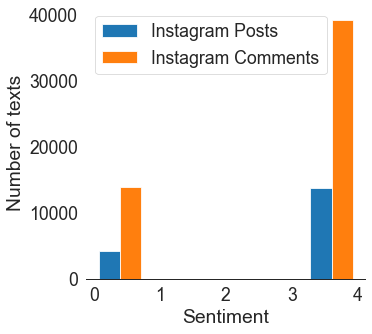

In [288]:
len_posts = len(df_instagram_unique[df_instagram_unique['is_comment'] == False])
len_neg_posts = len(df_instagram_unique[(df_instagram_unique['is_comment'] == False) \
                           & (df_instagram_unique['text_proc_sentiment'] == 4)])
print('posts', len_neg_posts/len_posts*100)
len_com = len(df_instagram_unique[df_instagram_unique['is_comment'] == True])
len_neg_com = len(df_instagram_unique[(df_instagram_unique['is_comment'] == True) \
                           & (df_instagram_unique['text_proc_sentiment'] == 4)])
print('comments', len_neg_com/len_com*100)
sns.set_context("paper", font_scale=2)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(5,5))
sns.despine(left=True)

ax.hist([df_instagram_unique[df_instagram_unique['is_comment'] == False]['text_proc_sentiment'],
         df_instagram_unique[df_instagram_unique['is_comment'] == True]['text_proc_sentiment']], 
              bins=5, label=["Instagram Posts" , "Instagram Comments"])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of texts')
ax.legend()
plt.show()

[Text(0, 0.5, 'count of posts and comments'),
 Text(0.5, 0, 'year of publications')]

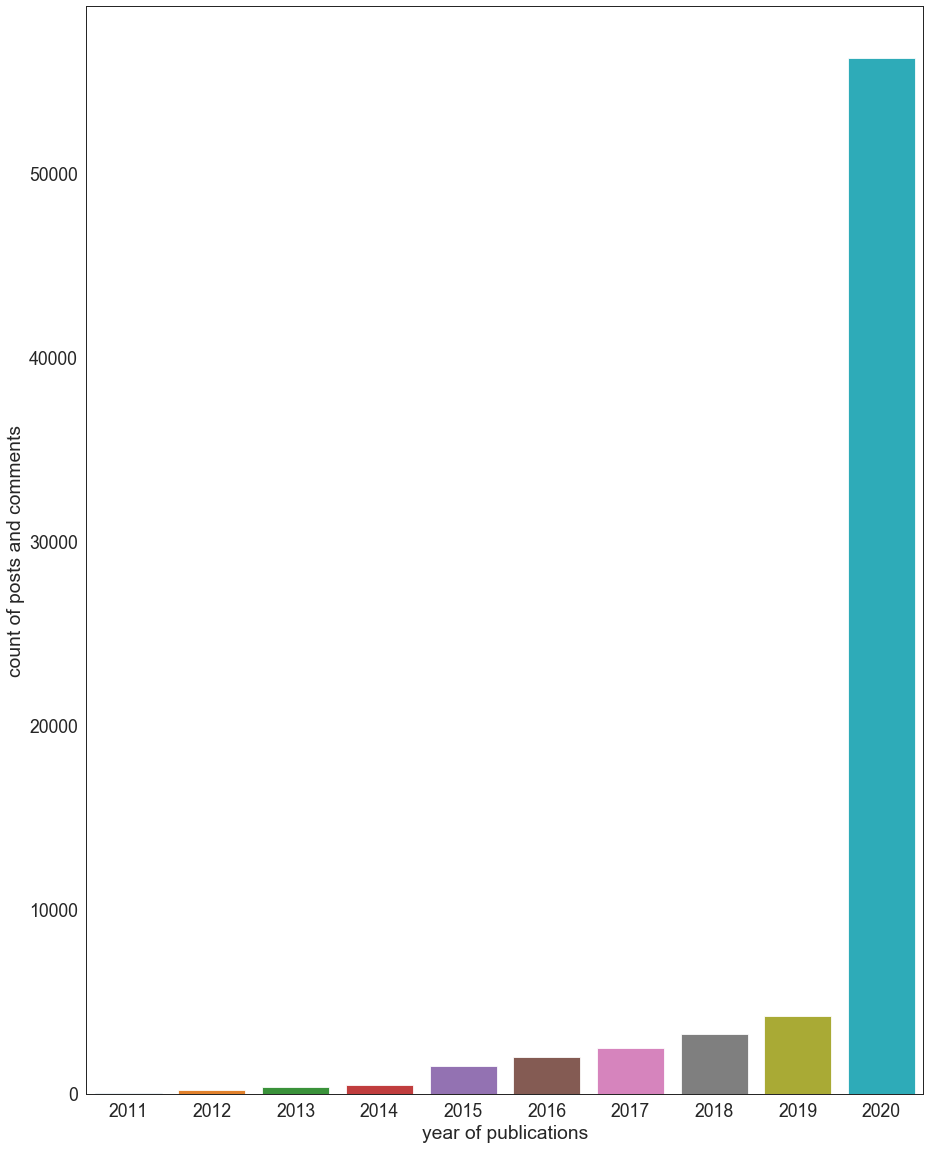

In [293]:
df_instagram_unique['date'] = df_instagram_unique['ts'].progress_apply(lambda t: pd.to_datetime(t, unit='s'))

In [303]:
df_instagram_unique['date_info'] = df_instagram_unique['date'].dt.month.map(str) + "-" + df_instagram_unique['date'].dt.year.map(str)
df_instagram_unique['year'] = df_instagram_unique['date'].dt.year.map(str)

df_instagram_unique_grouped_pos = df_instagram_unique[df_instagram_unique['text_proc_sentiment'] == 4].groupby(['year']).count()[['id']]
df_instagram_unique_grouped_neg = df_instagram_unique[df_instagram_unique['text_proc_sentiment'] == 0].groupby(['year']).count()[['id']]

df_inst_joined = df_instagram_unique_grouped_pos.join(df_instagram_unique_grouped_neg, on='year',lsuffix='_pos', rsuffix='_neg')


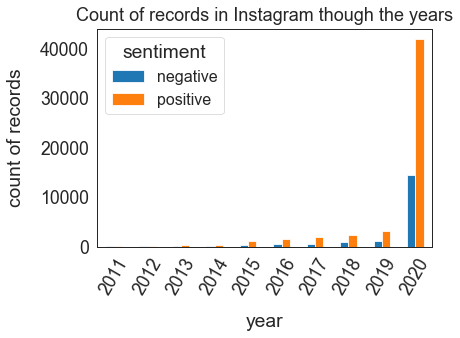

In [314]:
df_inst_joined[['id_neg', 'id_pos']].plot(kind='bar')
plt.xticks(rotation=60)
plt.title("Count of records in Instagram though the years", fontsize=18, y=1.01)
plt.xlabel("year", labelpad=15)
plt.ylabel("count of records", labelpad=15)
plt.legend(["negative", "positive"], fontsize=16, title="sentiment");

In [311]:
rate = df_inst_joined['id_pos']/df_inst_joined['id_neg']

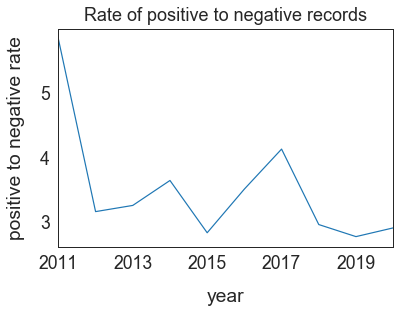

In [315]:
plt.title("Rate of positive to negative records", fontsize=18, y=1.01)
plt.xlabel("year", labelpad=15)
plt.ylabel("positive to negative rate", labelpad=15)
rate.plot()

<Figure size 2880x2160 with 0 Axes>

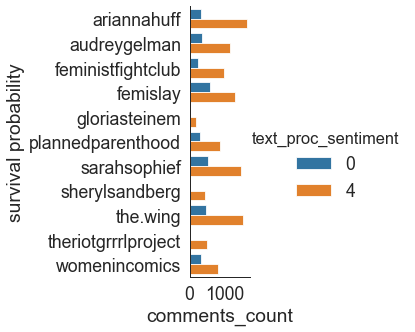

In [352]:
df_inst_tag = df_instagram[df_instagram['is_comment']==False].groupby(['tag', 'text_proc_sentiment']).count().reset_index()

plt.figure(figsize=(40,30))
g = sns.catplot(y="tag", x="comments_count", hue="text_proc_sentiment", data=df_inst_tag[df_inst_tag['id'] >100],kind="bar")
g.set_ylabels("survival probability")

In [ ]:
df_inst_tag = df_instagram[df_instagram['is_comment']==False].groupby(['tag', 'text_proc_sentiment']).count().reset_index()

plt.figure(figsize=(40,30))
g = sns.catplot(y="tag", x="comments_count", hue="text_proc_sentiment", data=df_inst_tag[df_inst_tag['id'] >100],kind="bar")
g.set_ylabels("survival probability")

## Reddit

6845


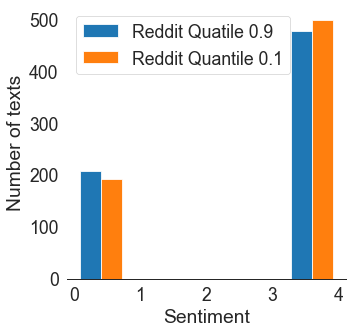

In [277]:
df_reddit_unique_with_likes = df_reddit_unique[(df_reddit_unique['score'] != 0)\
                                                         & (df_reddit_unique['topic_id'].isnull() == True)]
df_reddit_unpop = df_reddit_unique_with_likes[df_reddit_unique_with_likes.score \
                                            <= df_reddit_unique_with_likes.score.quantile(0.1)]
df_reddit_pop = df_reddit_unique_with_likes[df_reddit_unique_with_likes.score \
                                            >= df_reddit_unique_with_likes.score.quantile(0.9)]

sns.set_context("paper", font_scale=2)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(5,5))
sns.despine(left=True)

ax.hist([df_reddit_pop['text_proc_sentiment'], df_reddit_unpop['text_proc_sentiment']], 
              bins=5, label=["Reddit Quatile 0.9" , "Reddit Quantile 0.1"])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of texts')
ax.legend()
plt.show()

posts 65.9090909090909
comments 64.78280401578186


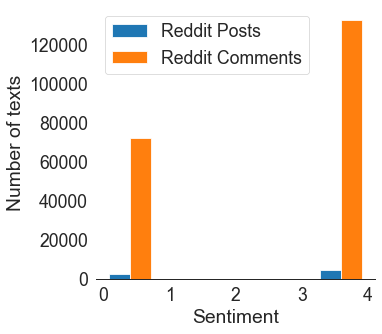

In [291]:
len_posts = len(df_reddit_unique[df_reddit_unique['topic_id'].isnull() == True])
len_neg_posts = len(df_reddit_unique[(df_reddit_unique['topic_id'].isnull() == True) \
                           & (df_reddit_unique['text_proc_sentiment'] == 4)])
print('posts', len_neg_posts/len_posts*100)

len_com = len(df_reddit_unique[df_reddit_unique['topic_id'].isnull() == False])
len_neg_com = len(df_reddit_unique[(df_reddit_unique['topic_id'].isnull() == False) \
                           & (df_reddit_unique['text_proc_sentiment'] == 4)])
print('comments', len_neg_com/len_com*100)

sns.set_context("paper", font_scale=2)
sns.set_style("white")
plt.rc('text', usetex=False)
fig, ax = plt.subplots(figsize=(5,5))
sns.despine(left=True)

ax.hist([df_reddit_unique[df_reddit_unique['topic_id'].isnull() == True]['text_proc_sentiment'],
         df_reddit_unique[df_reddit_unique['topic_id'].isnull() == False]['text_proc_sentiment']], 
              bins=5, label=["Reddit Posts" , "Reddit Comments"])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of texts')
ax.legend()
plt.show()

# Approaches for Sentiment Analysis

## tfidf

In [103]:
tfidf_vectorizer = TfidfVectorizer(min_df=20, max_df=0.9)
X = tfidf_vectorizer.fit_transform(df['txt_proc'].values)

In [43]:
tfidf_vectorizer = TfidfVectorizer(min_df=20, max_df=0.9)
X_sh = tfidf_vectorizer.fit_transform(df_short['txt_proc'].values)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.356, random_state=2364924)
clf = LogisticRegression(random_state=566,n_jobs=-1).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80    284707
           4       0.79      0.81      0.80    284893

    accuracy                           0.80    569600
   macro avg       0.80      0.80      0.80    569600
weighted avg       0.80      0.80      0.80    569600



In [44]:
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X_sh, y_short, test_size=0.356, random_state=2364924)
clf_sh = LogisticRegression(random_state=566,n_jobs=-1).fit(X_train_sh, y_train_sh)
y_hat_sh = clf_sh.predict(X_test_sh)
print(classification_report(y_test_sh, y_hat_sh))

/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.78      0.75      0.76    106031
           4       0.76      0.79      0.77    106394

    accuracy                           0.77    212425
   macro avg       0.77      0.77      0.77    212425
weighted avg       0.77      0.77      0.77    212425



In [86]:
#no stemming
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X_sh, y_short, test_size=0.356, random_state=2364924)
clf_sh = LogisticRegression(random_state=566,n_jobs=-1).fit(X_train_sh, y_train_sh)
y_hat_sh = clf_sh.predict(X_test_sh)
print(classification_report(y_test_sh, y_hat_sh))

/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.80      0.79      0.79    256526
           4       0.79      0.81      0.80    257077

    accuracy                           0.80    513603
   macro avg       0.80      0.80      0.80    513603
weighted avg       0.80      0.80      0.80    513603



In [105]:
X_1 = tfidf_vectorizer.transform(df_1_check['txt_proc'].values)
y_hat_1 = clf.predict(X_1)
print(classification_report(df_1_check['target'], y_hat_1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7781
           4       0.87      0.84      0.86      8582

    accuracy                           0.85     16363
   macro avg       0.85      0.85      0.85     16363
weighted avg       0.85      0.85      0.85     16363



## RandomForestClassifier

In [102]:
vectorizer = CountVectorizer(min_df=20, max_df=0.9)
X_sh = vectorizer.fit_transform(df_short['txt_proc'].values)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.356, random_state=2364924)

In [103]:
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X_sh, y_short, test_size=0.356, random_state=2364924)

In [75]:
clf = RandomForestClassifier(random_state=566,n_jobs=-1, verbose=1, n_estimators=600, max_depth=5)

In [104]:
clf = RandomForestClassifier(random_state=566,n_jobs=-1, verbose=1, n_estimators=600, max_depth=5)

In [25]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=566, verbose=1,
                       warm_start=False)

In [105]:
clf.fit(X_train_sh, y_train_sh)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   15.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=566, verbose=1,
                       warm_start=False)

In [26]:
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    8.4s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:   12.0s finished


              precision    recall  f1-score   support

           0       0.76      0.70      0.73    284707
           4       0.72      0.78      0.75    284893

    accuracy                           0.74    569600
   macro avg       0.74      0.74      0.74    569600
weighted avg       0.74      0.74      0.74    569600



In [77]:
y_hat_sh = clf.predict(X_test_sh)
print(classification_report(y_test_sh, y_hat_sh))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    4.3s finished


              precision    recall  f1-score   support

           0       0.75      0.71      0.73    256526
           4       0.72      0.76      0.74    257077

    accuracy                           0.73    513603
   macro avg       0.74      0.73      0.73    513603
weighted avg       0.74      0.73      0.73    513603



In [50]:
#no stemming
y_hat_sh = clf.predict(X_test_sh)
print(classification_report(y_test_sh, y_hat_sh))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    1.7s finished


              precision    recall  f1-score   support

           0       0.74      0.69      0.71    106031
           4       0.71      0.75      0.73    106394

    accuracy                           0.72    212425
   macro avg       0.72      0.72      0.72    212425
weighted avg       0.72      0.72      0.72    212425



## CatBoostClassifier

In [51]:
model = CatBoostClassifier(iterations=1000,
                          learning_rate=0.1,
                          depth=6)

In [75]:
X_boosting_train, X_valid, y_boosting_train, y_valid = train_test_split(X_train, y_train, test_size=0.356, random_state=2364924)


In [52]:
X_boosting_train_sh, X_valid_sh, y_boosting_train_sh, y_valid_sh = train_test_split(X_sh, y_short, test_size=0.356, random_state=2364924)


In [53]:
model.fit(X_boosting_train_sh, y_boosting_train_sh, plot=True, early_stopping_rounds=10, eval_set=(X_valid_sh, y_valid_sh))
# Get predictions


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6861601	test: 0.6861107	best: 0.6861107 (0)	total: 252ms	remaining: 4m 11s
1:	learn: 0.6801894	test: 0.6800898	best: 0.6800898 (1)	total: 396ms	remaining: 3m 17s
2:	learn: 0.6753802	test: 0.6752804	best: 0.6752804 (2)	total: 604ms	remaining: 3m 20s
3:	learn: 0.6712360	test: 0.6711086	best: 0.6711086 (3)	total: 790ms	remaining: 3m 16s
4:	learn: 0.6678701	test: 0.6677839	best: 0.6677839 (4)	total: 987ms	remaining: 3m 16s
5:	learn: 0.6646516	test: 0.6645856	best: 0.6645856 (5)	total: 1.17s	remaining: 3m 14s
6:	learn: 0.6617499	test: 0.6616834	best: 0.6616834 (6)	total: 1.39s	remaining: 3m 17s
7:	learn: 0.6591808	test: 0.6591817	best: 0.6591817 (7)	total: 1.61s	remaining: 3m 19s
8:	learn: 0.6568017	test: 0.6567830	best: 0.6567830 (8)	total: 1.81s	remaining: 3m 18s
9:	learn: 0.6546034	test: 0.6545682	best: 0.6545682 (9)	total: 2.04s	remaining: 3m 22s
10:	learn: 0.6524741	test: 0.6524810	best: 0.6524810 (10)	total: 2.24s	remaining: 3m 21s
11:	learn: 0.6505280	test: 0.6505186	best

93:	learn: 0.5916388	test: 0.5923313	best: 0.5923313 (93)	total: 17.8s	remaining: 2m 51s
94:	learn: 0.5912836	test: 0.5919835	best: 0.5919835 (94)	total: 18.1s	remaining: 2m 52s
95:	learn: 0.5909149	test: 0.5915826	best: 0.5915826 (95)	total: 18.3s	remaining: 2m 52s
96:	learn: 0.5905465	test: 0.5912076	best: 0.5912076 (96)	total: 18.5s	remaining: 2m 51s
97:	learn: 0.5902061	test: 0.5908946	best: 0.5908946 (97)	total: 18.6s	remaining: 2m 51s
98:	learn: 0.5898588	test: 0.5905370	best: 0.5905370 (98)	total: 18.8s	remaining: 2m 51s
99:	learn: 0.5895283	test: 0.5902154	best: 0.5902154 (99)	total: 19s	remaining: 2m 50s
100:	learn: 0.5891551	test: 0.5898599	best: 0.5898599 (100)	total: 19.1s	remaining: 2m 50s
101:	learn: 0.5888534	test: 0.5895664	best: 0.5895664 (101)	total: 19.4s	remaining: 2m 50s
102:	learn: 0.5885325	test: 0.5892723	best: 0.5892723 (102)	total: 19.6s	remaining: 2m 51s
103:	learn: 0.5882036	test: 0.5889644	best: 0.5889644 (103)	total: 19.8s	remaining: 2m 50s
104:	learn: 0.5

184:	learn: 0.5678386	test: 0.5692281	best: 0.5692281 (184)	total: 34.4s	remaining: 2m 31s
185:	learn: 0.5676260	test: 0.5690189	best: 0.5690189 (185)	total: 34.5s	remaining: 2m 31s
186:	learn: 0.5674174	test: 0.5688302	best: 0.5688302 (186)	total: 34.7s	remaining: 2m 30s
187:	learn: 0.5672483	test: 0.5686768	best: 0.5686768 (187)	total: 34.9s	remaining: 2m 30s
188:	learn: 0.5670742	test: 0.5685064	best: 0.5685064 (188)	total: 35s	remaining: 2m 30s
189:	learn: 0.5668872	test: 0.5683400	best: 0.5683400 (189)	total: 35.2s	remaining: 2m 30s
190:	learn: 0.5667065	test: 0.5681611	best: 0.5681611 (190)	total: 35.4s	remaining: 2m 29s
191:	learn: 0.5665221	test: 0.5679906	best: 0.5679906 (191)	total: 35.6s	remaining: 2m 29s
192:	learn: 0.5663520	test: 0.5678149	best: 0.5678149 (192)	total: 35.8s	remaining: 2m 29s
193:	learn: 0.5661698	test: 0.5676352	best: 0.5676352 (193)	total: 36s	remaining: 2m 29s
194:	learn: 0.5659750	test: 0.5674653	best: 0.5674653 (194)	total: 36.2s	remaining: 2m 29s
195

275:	learn: 0.5536189	test: 0.5557670	best: 0.5557670 (275)	total: 50.4s	remaining: 2m 12s
276:	learn: 0.5534931	test: 0.5556739	best: 0.5556739 (276)	total: 50.6s	remaining: 2m 12s
277:	learn: 0.5533556	test: 0.5555342	best: 0.5555342 (277)	total: 50.9s	remaining: 2m 12s
278:	learn: 0.5532069	test: 0.5553887	best: 0.5553887 (278)	total: 51.1s	remaining: 2m 12s
279:	learn: 0.5530769	test: 0.5552664	best: 0.5552664 (279)	total: 51.3s	remaining: 2m 11s
280:	learn: 0.5529551	test: 0.5551488	best: 0.5551488 (280)	total: 51.5s	remaining: 2m 11s
281:	learn: 0.5528355	test: 0.5550357	best: 0.5550357 (281)	total: 51.8s	remaining: 2m 11s
282:	learn: 0.5526775	test: 0.5548731	best: 0.5548731 (282)	total: 52s	remaining: 2m 11s
283:	learn: 0.5525423	test: 0.5547477	best: 0.5547477 (283)	total: 52.3s	remaining: 2m 11s
284:	learn: 0.5524279	test: 0.5546404	best: 0.5546404 (284)	total: 52.5s	remaining: 2m 11s
285:	learn: 0.5523051	test: 0.5545178	best: 0.5545178 (285)	total: 52.6s	remaining: 2m 11s
2

367:	learn: 0.5435905	test: 0.5465199	best: 0.5465199 (367)	total: 1m 7s	remaining: 1m 55s
368:	learn: 0.5434979	test: 0.5464331	best: 0.5464331 (368)	total: 1m 7s	remaining: 1m 55s
369:	learn: 0.5434034	test: 0.5463483	best: 0.5463483 (369)	total: 1m 7s	remaining: 1m 55s
370:	learn: 0.5433135	test: 0.5462499	best: 0.5462499 (370)	total: 1m 7s	remaining: 1m 55s
371:	learn: 0.5432212	test: 0.5461696	best: 0.5461696 (371)	total: 1m 8s	remaining: 1m 54s
372:	learn: 0.5431284	test: 0.5460897	best: 0.5460897 (372)	total: 1m 8s	remaining: 1m 54s
373:	learn: 0.5430391	test: 0.5460069	best: 0.5460069 (373)	total: 1m 8s	remaining: 1m 54s
374:	learn: 0.5429500	test: 0.5459253	best: 0.5459253 (374)	total: 1m 8s	remaining: 1m 54s
375:	learn: 0.5428501	test: 0.5458306	best: 0.5458306 (375)	total: 1m 8s	remaining: 1m 54s
376:	learn: 0.5427585	test: 0.5457474	best: 0.5457474 (376)	total: 1m 8s	remaining: 1m 53s
377:	learn: 0.5426791	test: 0.5456813	best: 0.5456813 (377)	total: 1m 9s	remaining: 1m 53s

457:	learn: 0.5360297	test: 0.5397594	best: 0.5397594 (457)	total: 1m 22s	remaining: 1m 37s
458:	learn: 0.5359527	test: 0.5396889	best: 0.5396889 (458)	total: 1m 22s	remaining: 1m 37s
459:	learn: 0.5358845	test: 0.5396331	best: 0.5396331 (459)	total: 1m 22s	remaining: 1m 37s
460:	learn: 0.5358144	test: 0.5395715	best: 0.5395715 (460)	total: 1m 22s	remaining: 1m 37s
461:	learn: 0.5357464	test: 0.5395170	best: 0.5395170 (461)	total: 1m 23s	remaining: 1m 36s
462:	learn: 0.5356651	test: 0.5394395	best: 0.5394395 (462)	total: 1m 23s	remaining: 1m 36s
463:	learn: 0.5355958	test: 0.5393656	best: 0.5393656 (463)	total: 1m 23s	remaining: 1m 36s
464:	learn: 0.5355216	test: 0.5392918	best: 0.5392918 (464)	total: 1m 23s	remaining: 1m 36s
465:	learn: 0.5354486	test: 0.5392177	best: 0.5392177 (465)	total: 1m 23s	remaining: 1m 36s
466:	learn: 0.5353770	test: 0.5391649	best: 0.5391649 (466)	total: 1m 24s	remaining: 1m 35s
467:	learn: 0.5353160	test: 0.5391147	best: 0.5391147 (467)	total: 1m 24s	remain

547:	learn: 0.5299195	test: 0.5343975	best: 0.5343975 (547)	total: 1m 38s	remaining: 1m 21s
548:	learn: 0.5298629	test: 0.5343550	best: 0.5343550 (548)	total: 1m 38s	remaining: 1m 21s
549:	learn: 0.5297960	test: 0.5342923	best: 0.5342923 (549)	total: 1m 38s	remaining: 1m 20s
550:	learn: 0.5297363	test: 0.5342326	best: 0.5342326 (550)	total: 1m 39s	remaining: 1m 20s
551:	learn: 0.5296817	test: 0.5341806	best: 0.5341806 (551)	total: 1m 39s	remaining: 1m 20s
552:	learn: 0.5296235	test: 0.5341264	best: 0.5341264 (552)	total: 1m 39s	remaining: 1m 20s
553:	learn: 0.5295603	test: 0.5340833	best: 0.5340833 (553)	total: 1m 39s	remaining: 1m 20s
554:	learn: 0.5295074	test: 0.5340359	best: 0.5340359 (554)	total: 1m 39s	remaining: 1m 19s
555:	learn: 0.5294466	test: 0.5339779	best: 0.5339779 (555)	total: 1m 39s	remaining: 1m 19s
556:	learn: 0.5293792	test: 0.5339126	best: 0.5339126 (556)	total: 1m 40s	remaining: 1m 19s
557:	learn: 0.5293271	test: 0.5338679	best: 0.5338679 (557)	total: 1m 40s	remain

638:	learn: 0.5247935	test: 0.5300899	best: 0.5300899 (638)	total: 1m 54s	remaining: 1m 4s
639:	learn: 0.5247445	test: 0.5300495	best: 0.5300495 (639)	total: 1m 54s	remaining: 1m 4s
640:	learn: 0.5246880	test: 0.5299928	best: 0.5299928 (640)	total: 1m 54s	remaining: 1m 4s
641:	learn: 0.5246341	test: 0.5299371	best: 0.5299371 (641)	total: 1m 54s	remaining: 1m 4s
642:	learn: 0.5245919	test: 0.5299036	best: 0.5299036 (642)	total: 1m 55s	remaining: 1m 3s
643:	learn: 0.5245461	test: 0.5298731	best: 0.5298731 (643)	total: 1m 55s	remaining: 1m 3s
644:	learn: 0.5244940	test: 0.5298212	best: 0.5298212 (644)	total: 1m 55s	remaining: 1m 3s
645:	learn: 0.5244483	test: 0.5297889	best: 0.5297889 (645)	total: 1m 55s	remaining: 1m 3s
646:	learn: 0.5243982	test: 0.5297477	best: 0.5297477 (646)	total: 1m 55s	remaining: 1m 3s
647:	learn: 0.5243543	test: 0.5297123	best: 0.5297123 (647)	total: 1m 55s	remaining: 1m 2s
648:	learn: 0.5243011	test: 0.5296739	best: 0.5296739 (648)	total: 1m 55s	remaining: 1m 2s

730:	learn: 0.5203247	test: 0.5263321	best: 0.5263321 (730)	total: 2m 10s	remaining: 47.9s
731:	learn: 0.5202792	test: 0.5263012	best: 0.5263012 (731)	total: 2m 10s	remaining: 47.7s
732:	learn: 0.5202352	test: 0.5262638	best: 0.5262638 (732)	total: 2m 10s	remaining: 47.5s
733:	learn: 0.5201949	test: 0.5262339	best: 0.5262339 (733)	total: 2m 10s	remaining: 47.3s
734:	learn: 0.5201479	test: 0.5261949	best: 0.5261949 (734)	total: 2m 10s	remaining: 47.1s
735:	learn: 0.5201038	test: 0.5261522	best: 0.5261522 (735)	total: 2m 10s	remaining: 47s
736:	learn: 0.5200667	test: 0.5261233	best: 0.5261233 (736)	total: 2m 11s	remaining: 46.8s
737:	learn: 0.5200167	test: 0.5260888	best: 0.5260888 (737)	total: 2m 11s	remaining: 46.6s
738:	learn: 0.5199693	test: 0.5260391	best: 0.5260391 (738)	total: 2m 11s	remaining: 46.4s
739:	learn: 0.5199303	test: 0.5260128	best: 0.5260128 (739)	total: 2m 11s	remaining: 46.2s
740:	learn: 0.5198882	test: 0.5259772	best: 0.5259772 (740)	total: 2m 11s	remaining: 46s
741

822:	learn: 0.5164025	test: 0.5232187	best: 0.5232187 (822)	total: 2m 25s	remaining: 31.2s
823:	learn: 0.5163594	test: 0.5231873	best: 0.5231873 (823)	total: 2m 25s	remaining: 31s
824:	learn: 0.5163058	test: 0.5231494	best: 0.5231494 (824)	total: 2m 25s	remaining: 30.8s
825:	learn: 0.5162662	test: 0.5231218	best: 0.5231218 (825)	total: 2m 25s	remaining: 30.7s
826:	learn: 0.5162252	test: 0.5230911	best: 0.5230911 (826)	total: 2m 25s	remaining: 30.5s
827:	learn: 0.5161842	test: 0.5230537	best: 0.5230537 (827)	total: 2m 25s	remaining: 30.3s
828:	learn: 0.5161463	test: 0.5230203	best: 0.5230203 (828)	total: 2m 26s	remaining: 30.1s
829:	learn: 0.5161108	test: 0.5230011	best: 0.5230011 (829)	total: 2m 26s	remaining: 30s
830:	learn: 0.5160639	test: 0.5229605	best: 0.5229605 (830)	total: 2m 26s	remaining: 29.8s
831:	learn: 0.5160267	test: 0.5229335	best: 0.5229335 (831)	total: 2m 26s	remaining: 29.6s
832:	learn: 0.5159865	test: 0.5229002	best: 0.5229002 (832)	total: 2m 26s	remaining: 29.4s
833

913:	learn: 0.5129078	test: 0.5204564	best: 0.5204564 (913)	total: 2m 40s	remaining: 15.1s
914:	learn: 0.5128719	test: 0.5204291	best: 0.5204291 (914)	total: 2m 40s	remaining: 15s
915:	learn: 0.5128397	test: 0.5204141	best: 0.5204141 (915)	total: 2m 41s	remaining: 14.8s
916:	learn: 0.5128092	test: 0.5203886	best: 0.5203886 (916)	total: 2m 41s	remaining: 14.6s
917:	learn: 0.5127662	test: 0.5203528	best: 0.5203528 (917)	total: 2m 41s	remaining: 14.4s
918:	learn: 0.5127309	test: 0.5203260	best: 0.5203260 (918)	total: 2m 41s	remaining: 14.2s
919:	learn: 0.5126943	test: 0.5202976	best: 0.5202976 (919)	total: 2m 41s	remaining: 14.1s
920:	learn: 0.5126646	test: 0.5202691	best: 0.5202691 (920)	total: 2m 41s	remaining: 13.9s
921:	learn: 0.5126254	test: 0.5202327	best: 0.5202327 (921)	total: 2m 42s	remaining: 13.7s
922:	learn: 0.5125957	test: 0.5202033	best: 0.5202033 (922)	total: 2m 42s	remaining: 13.5s
923:	learn: 0.5125648	test: 0.5201825	best: 0.5201825 (923)	total: 2m 42s	remaining: 13.4s
9

In [77]:
y_hat = model.predict(X_test)

In [54]:
y_hat_sh = model.predict(X_test_sh)

In [78]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78    284707
           4       0.77      0.82      0.79    284893

    accuracy                           0.78    569600
   macro avg       0.78      0.78      0.78    569600
weighted avg       0.78      0.78      0.78    569600



In [55]:
print(classification_report(y_test_sh, y_hat_sh))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    106031
           4       0.73      0.81      0.77    106394

    accuracy                           0.75    212425
   macro avg       0.76      0.75      0.75    212425
weighted avg       0.76      0.75      0.75    212425



## Sentiment on IMDB dataset

In [113]:
imdb_train = []
for line in open('../POM/aclImdb/movie_data/full_train.txt', 'r'):
    imdb_train.append(line.strip())
    
imdb_test = []
for line in open('../POM/aclImdb/movie_data/full_test.txt', 'r'):
    imdb_test.append(line.strip())

In [115]:
imdb_train_proc = list(tqdm(map(lambda t: ' '.join(text_preprocessing(t, False)), imdb_train), total=len(imdb_train)))

In [116]:
vectorizer = CountVectorizer(min_df=20, max_df=0.9)
X = vectorizer.fit_transform(imdb_train_proc)

In [117]:
target = [1 if i < 12500 else 0 for i in range(25000)]

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

In [62]:
clf = LogisticRegression(random_state=566,n_jobs=-1).fit(X_train, y_train)

/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [63]:
y_hat = clf.predict(X_val)
print(classification_report(y_val, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3120
           1       0.87      0.88      0.87      3130

    accuracy                           0.87      6250
   macro avg       0.87      0.87      0.87      6250
weighted avg       0.87      0.87      0.87      6250



In [126]:
tfidf_vectorizer = TfidfVectorizer(min_df=20, max_df=0.9)
X = tfidf_vectorizer.fit_transform(imdb_train_proc)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.356, random_state=2364924)
clf = LogisticRegression(random_state=566,n_jobs=-1).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lirriel/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4500
           1       0.86      0.90      0.88      4400

    accuracy                           0.88      8900
   macro avg       0.88      0.88      0.88      8900
weighted avg       0.88      0.88      0.88      8900



In [65]:
vectorizer = CountVectorizer(min_df=20, max_df=0.9)
X_sh = vectorizer.fit_transform(imdb_train_proc)
X_train, X_test, y_train, y_test = train_test_split(X_sh, target, test_size=0.356, random_state=2364924)
clf = RandomForestClassifier(random_state=566,n_jobs=-1, verbose=1, n_estimators=600, max_depth=5)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s


              precision    recall  f1-score   support

           0       0.89      0.74      0.81      4500
           1       0.77      0.91      0.84      4400

    accuracy                           0.82      8900
   macro avg       0.83      0.83      0.82      8900
weighted avg       0.83      0.82      0.82      8900



[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.6s finished


In [68]:
df_inst.head()

,tag,text,likes
0,feminismo,quem maisebook amazon brasil livros leia leiag...,3527
1,feminismo,sunflowerrevolvingheartsmi otra cuenta fleursd...,15760
2,feminismo,vamo fechar,7294
3,feminismo,gracinha,6100
4,feminismo,raisedfistmediumskintone,4040


In [106]:
# vectorizer = CountVectorizer(min_df=20, max_df=0.9)
X_inst = vectorizer.transform(df_inst['text'].values)

In [84]:
X_inst =  tfidf_vectorizer.transform(df_inst['text'])

In [107]:
df_inst['result'] = clf.predict(X_inst)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 600 out of 600 | elapsed:    0.6s finished


In [110]:
len(df_inst[df_inst['result'] == 0]), len(df_inst[df_inst['result'] == 4])

(18447, 61803)

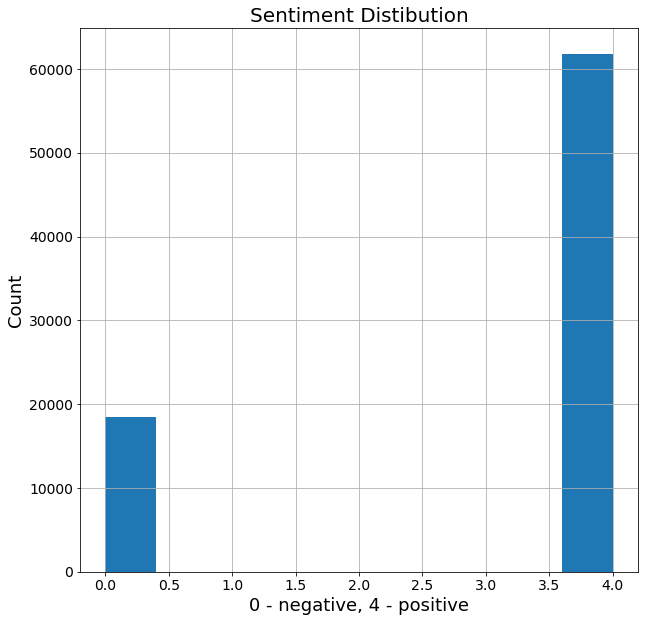

In [115]:
plt.figure(figsize=(10,10))
df_inst['result'].hist()
plt.xlabel('0 - negative, 4 - positive')
plt.ylabel('Count')
plt.title('Sentiment Distibution')
plt.show()

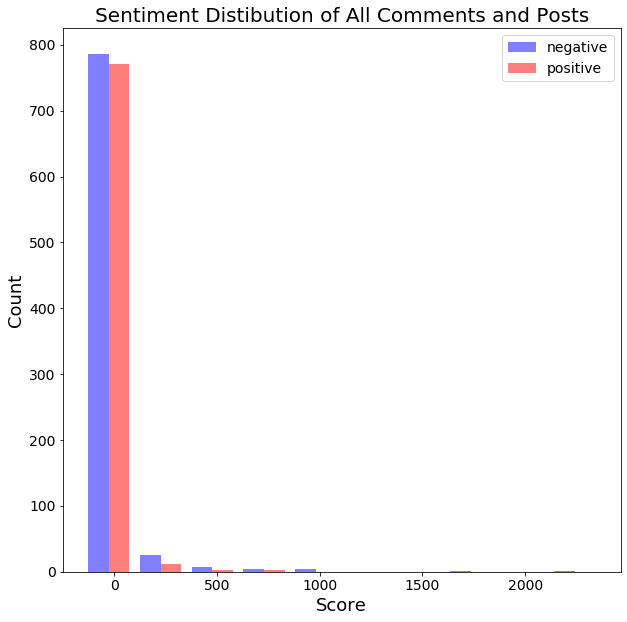

In [143]:
plt.figure(figsize=(10,10))
plt.hist([df_reddit[df_reddit['result'] == 1 & (df_reddit['score'] != 0)]['score'], 
          df_reddit[df_reddit['result'] == 0 & (df_reddit['score'] != 0)]['score']], 
         color=['b','r'], alpha=0.5, bins=10, label=['negative', 'positive'])
plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distibution of All Comments and Posts')
plt.show()

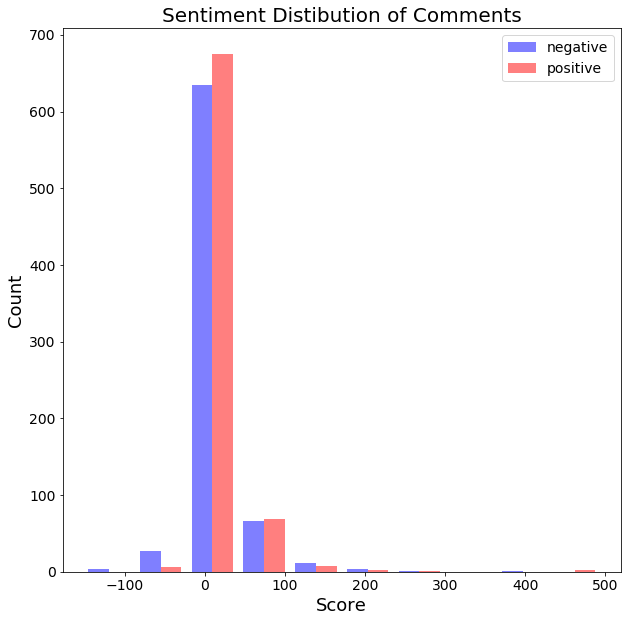

In [138]:
plt.figure(figsize=(10,10))
plt.hist([df_reddit[(df_reddit['result'] == 1) & (df_reddit['is_comment'] != True) & (df_reddit['score'] != 0)]['score'], 
          df_reddit[(df_reddit['result'] == 0) & (df_reddit['is_comment'] != True) & (df_reddit['score'] != 0)]['score']], 
         color=['b','r'], alpha=0.5, bins=10, label=['negative', 'positive'])
plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distibution of Comments')
plt.show()

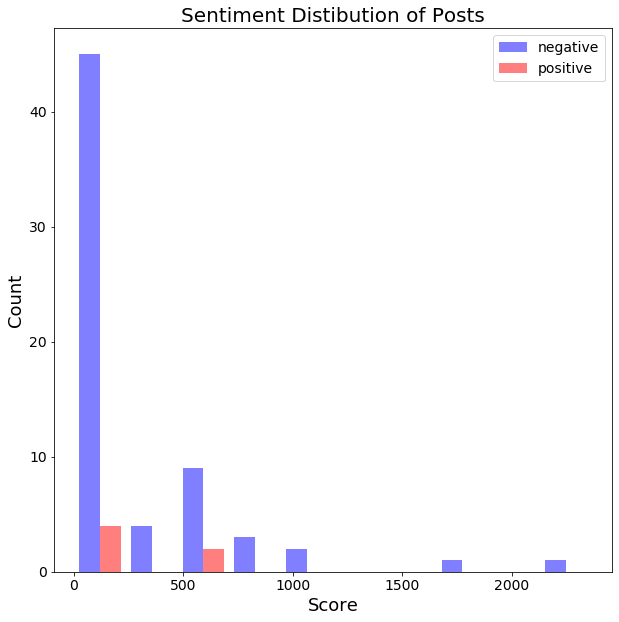

In [139]:
plt.figure(figsize=(10,10))
plt.hist([df_reddit[(df_reddit['result'] == 1) & (df_reddit['is_comment'] == True) & (df_reddit['score'] != 0)]['score'], 
          df_reddit[(df_reddit['result'] == 0) & (df_reddit['is_comment'] == True) & (df_reddit['score'] != 0)]['score']], 
         color=['b','r'], alpha=0.5, bins=10, label=['negative', 'positive'])
plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distibution of Posts')
plt.show()

In [151]:
df_reddit['date'] = pd.to_datetime(df_reddit['utc'], unit='s')

In [152]:
df_reddit.head()

,text,score,utc,is_comment,text_proc,result,date
0,"Hello everyone,\n\nI've always been interested...",434,1.534326e+09,True,hello everyoneive always been interested in st...,1,2018-08-15 09:37:48
1,[удалено],1,1.537705e+09,False,,1,2018-09-23 12:18:28
2,I would highly recommend the Essential Feminis...,1,1.534353e+09,False,i would highly recommend the essential feminis...,1,2018-08-15 17:08:56
3,"and there are blogs on it, like\nhttps://femin...",1,1.542696e+09,False,and there are blogs on it like,0,2018-11-20 06:35:33
4,"and there are blogs on it, like\nhttps://femin...",1,1.542696e+09,False,and there are blogs on it like,0,2018-11-20 06:35:33


In [153]:
df_reddit['week_number'] = df_reddit['date'].dt.week

In [154]:
df_reddit['year'] = df_reddit['date'].dt.year

In [155]:
df_reddit.head()

,text,score,utc,is_comment,text_proc,result,date,week_number,year
0,"Hello everyone,\n\nI've always been interested...",434,1.534326e+09,True,hello everyoneive always been interested in st...,1,2018-08-15 09:37:48,33,2018
1,[удалено],1,1.537705e+09,False,,1,2018-09-23 12:18:28,38,2018
2,I would highly recommend the Essential Feminis...,1,1.534353e+09,False,i would highly recommend the essential feminis...,1,2018-08-15 17:08:56,33,2018
3,"and there are blogs on it, like\nhttps://femin...",1,1.542696e+09,False,and there are blogs on it like,0,2018-11-20 06:35:33,47,2018
4,"and there are blogs on it, like\nhttps://femin...",1,1.542696e+09,False,and there are blogs on it like,0,2018-11-20 06:35:33,47,2018


In [156]:
df_reddit.set_index(['year', 'week_number'])

text  score  \
year week_number                                                             
2018 33           Hello everyone,\n\nI've always been interested...    434   
     38                                                   [удалено]      1   
     33           I would highly recommend the Essential Feminis...      1   
     47           and there are blogs on it, like\nhttps://femin...      1   
     47           and there are blogs on it, like\nhttps://femin...      1   
...                                                             ...    ...   
2020 18           You don't understand the argument. Objectifica...      1   
     18           You don't understand the argument. Objectifica...      1   
     17                                                                  7   
     17           The guy has been reported to the authorities a...      9   
     17           Honestly arabs are extremly racist towards bla...      1   

                           utc  is_comment  \
year week_number                             
2018 33           1.534326e+09        True   
     38           1.537705e+09       False   
     33           1.534353e+09       False   
     47           1.542696e+09       False   
     47           1.542696e+09       False   
...                        ...         ...   
2020 18           1.588031e+09       False   
     18           1.588031e+09       False   
     17           1.587734e+09        True   
     17           1.587731e+09        True   
     17           1.587920e+09       False   

                                                          text_proc  result  \
year week_number                                                              
2018 33           hello everyoneive always been interested in st...       1   
     38                                                                   1   
     33           i would highly recommend the essential feminis...       1   
     47                              and there are blogs on it like       0   
     47                              and there are blogs on it like       0   
...                                                             ...     ...   
2020 18           you do not understand the argument objectifica...       1   
     18           you do not understand the argument objectifica...       1   
     17                                                                   1   
     17           the guy has been reported to the authorities a...       0   
     17           honestly arabs are extremly racist towards bla...       0   

                                date  
year week_number                      
2018 33          2018-08-15 09:37:48  
     38          2018-09-23 12:18:28  
     33          2018-08-15 17:08:56  
     47          2018-11-20 06:35:33  
     47          2018-11-20 06:35:33  
...                              ...  
2020 18          2020-04-27 23:37:13  
     18          2020-04-27 23:37:13  
     17          2020-04-24 13:14:08  
     17          2020-04-24 12:30:01  
     17          2020-04-26 16:58:22  

[1645 rows x 7 columns]

In [158]:
grouped_pos = df_reddit[df_reddit['result'] == 1].groupby(['year', 'week_number']).count()
grouped_neg = df_reddit[df_reddit['result'] == 0].groupby(['year', 'week_number']).count()

In [160]:
grouped_neg

text  score  utc  is_comment  text_proc  result  date
year week_number                                                       
2018 33              5      5    5           5          5       5     5
     34              2      2    2           2          2       2     2
     36              1      1    1           1          1       1     1
     37              2      2    2           2          2       2     2
     40              1      1    1           1          1       1     1
     44              2      2    2           2          2       2     2
     45              2      2    2           2          2       2     2
     47              2      2    2           2          2       2     2
     52              1      1    1           1          1       1     1
2019 1               1      1    1           1          1       1     1
     2               2      2    2           2          2       2     2
     3               1      1    1           1          1       1     1
2020 17            162    162  162         162        162     162   162
     18            512    512  512         512        512     512   512
     19            150    150  150         150        150     150   150

In [157]:
barWidth = 0.25

plt.bar(r1, grouped_pos['result'], color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, grouped_neg, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

0       1
1       1
2       1
3       0
4       0
       ..
1640    1
1641    1
1642    1
1643    0
1644    0
Name: result, Length: 1645, dtype: int64